# Trabalho 2

## 4.1

### Imports

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

### Variáveis

In [2]:
ficheiro = "../../ficheiros/Trabalho 2/Dados_Trabalho_TP2.csv"
colunas_classes_binarias = ['Genero', 'Historico_obesidade_familiar', 'FCCAC', 'Fumador', 'MCC']  # Colunas de valores binários, ver 4.1.1.
colunas_numericas = ["Idade", "FCV", "NRP", "CA", "FAF", "TUDE", "IMC"]

%matplotlib inline

# Funções auxiliares

In [3]:
def titulo(texto: str):
    print(f"\033[21;30;44m{texto}\033[0m")


def etiqueta_e_valor(etiqueta: str, valor: str = ""):
    print(f"\033[0;94m{etiqueta}: \033[1;94m{valor}\033[0m")


def texto(texto: str, cor="94"):
    print(f"\033[0;{cor}m{texto}\033[0m")


def undersplit(texto):
    return " ".join(texto.split("_"))


def histograma(
        dados: pd.Series,
        grupos: int = 20,
        kde: bool = True,
        size_x: int = 4,
        size_y: int = 4,
        titulo: str = "",
        etiqueta_x: str = "",
        etiqueta_y: str = "",
        color: str = "skyblue",
        edgecolor: str = "black",
):
    """Gera um histograma de forma isolada.
    
    A dimensão final do gráfico é controlada pela relação entre os valores size_x e size_y.
    """
    hist_fig, hist_axes = plt.subplots(figsize=(size_x, size_y))
    sns.histplot(dados, bins=grupos, kde=kde, color=color, edgecolor=edgecolor)
    hist_axes.set_title(titulo)
    hist_axes.set_xlabel(etiqueta_x)
    hist_axes.set_ylabel(etiqueta_y)
    plt.tight_layout()


def tarte(
        dados: pd.Series,
        size_x: int = 4,
        size_y: int = 4,
        autopct="%.2f%%",
        titulo: str = "",
        **kwargs,
):
    pie_fig, pie_axes = plt.subplots(figsize=(size_x, size_y))
    pie_axes.pie(
        dados,
        autopct=autopct,
        **kwargs
    )
    pie_fig.suptitle(titulo)
    return pie_fig, pie_axes



### Inicializações

In [4]:
warnings.filterwarnings("ignore")  # Desabilitar warnbings.
plt.style.use(
    "style/estilo.mplstyle")  # Garantir que se utiliza um estilo definido centralmente e comum a todos os gráficos.
label_encoder = LabelEncoder()

### 4.1.1

#### Leitura de dados

Como os dados lidos não são em grande quantidade, vamos criar uma cópia do **dataset** para trabalharmos nesta, para poder ter acesso aos "originais" sem ter de os ler novamente do ficheiro.
Por exemplo em alguns dos gráficos, a utilização das *classes* (valores originais) como *etiqueta* é mais elucidativa que usar os valores codificados.  

Na análise ao **dataset** verifica-se que a primeira coluna, identificada como "Unnamed" tem o indíce de cada registo de dados, algo que nos é fornecido pelo **pandas**, e portanto podemos eliminar esta coluna. 
Esta operação estaria incluída nas tarefas do ponto *4.1.4*, mas realizar neste ponto facilita a criação dos gráficos no próximo ponto.

In [5]:
dados_lidos = pd.read_csv(ficheiro)
dados_trabalho = dados_lidos.copy()
dados_trabalho = dados_trabalho.drop(columns=dados_lidos.columns[0], axis=1)

### Dimensão dos dados

In [6]:
nr_linhas, nr_colunas = dados_trabalho.shape
titulo("Dimensão dos dados")
etiqueta_e_valor("Número de linhas:", nr_linhas)
etiqueta_e_valor("Número de colunas:", nr_colunas)

Dimensão dos dados
Número de linhas:: 2111
Número de colunas:: 17


### Análise do dataset

#### Atributos

Descrição dos atributos, segundo a documentação. 

| Sigla | Descrição                                                         |
|-------|-------------------------------------------------------------------|
| FCCAC | Frequência de Consumo de Comida Altamente Calórica                | 
| FCV   | Frequência de Consumo de Vegetais                                 | 
| NRP   | Número de Refeições Principais                                    |
| CCER  | Consumo de Comida Entre Refeições                                 |
| CA    | Consumo de Água                                                   |
| CBA   | Consumo de Bebidas Alcoólicas                                     |
| MCC   | Monitorização do Consumo Calorias Histórico de Obesidade Familiar | 

#### Informação sobre o dataset

A função ``info()`` apresenta a informação das colunas (atríbutos): Index da coluna, nome (se tiver, quantidade de registos *não nulos* e o tipo de dados de cada um deles.

In [7]:
dados_trabalho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Genero                        2111 non-null   object 
 1   Idade                         2111 non-null   float64
 2   Altura                        2111 non-null   float64
 3   Peso                          2111 non-null   float64
 4   Historico_obesidade_familiar  2111 non-null   object 
 5   FCCAC                         2111 non-null   object 
 6   FCV                           2111 non-null   float64
 7   NRP                           2111 non-null   float64
 8   CCER                          2111 non-null   object 
 9   Fumador                       2111 non-null   object 
 10  CA                            2111 non-null   float64
 11  MCC                           2111 non-null   object 
 12  FAF                           2111 non-null   float64
 13  TUD

#### Amostra do dataset

Para uma rápida visualização dos dados, temos as funções ``head(n)`` e ``tail(n)`` que nos dão *n* linhas, por defeito **5**, respetivamente do início ou fim do **dataset**.

In [8]:
dados_trabalho.head()

,Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label
0,Feminino,21.0,1.62,64.0,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.0,Nao,0.0,1.0,Nao,Transportes_Publicos,Peso_Normal
1,Feminino,21.0,1.52,56.0,Sim,Nao,3.0,3.0,Ocasionalmente,Sim,3.0,Sim,3.0,0.0,Ocasionalmente,Transportes_Publicos,Peso_Normal
2,Masculino,23.0,1.80,77.0,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.0,Nao,2.0,1.0,Frequentemente,Transportes_Publicos,Peso_Normal
3,Masculino,27.0,1.80,87.0,Nao,Nao,3.0,3.0,Ocasionalmente,Nao,2.0,Nao,2.0,0.0,Frequentemente,Caminhada,Excesso_Peso_Grau_I
4,Masculino,22.0,1.78,89.8,Nao,Nao,2.0,1.0,Ocasionalmente,Nao,2.0,Nao,0.0,0.0,Ocasionalmente,Transportes_Publicos,Excesso_Peso_Grau_II


In [9]:
dados_trabalho.tail()

,Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label
2106,Feminino,20.976842,1.710730,131.408528,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,1.728139,Nao,1.676269,0.906247,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida
2107,Feminino,21.982942,1.748584,133.742943,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.005130,Nao,1.341390,0.599270,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida
2108,Feminino,22.524036,1.752206,133.689352,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.054193,Nao,1.414209,0.646288,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida
2109,Feminino,24.361936,1.739450,133.346641,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.852339,Nao,1.139107,0.586035,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida
2110,Feminino,23.664709,1.738836,133.472641,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.863513,Nao,1.026452,0.714137,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida


#### Descrição do dados do dateset

A função ``describe()`` analisa os dados do **dataset** e retorna um conjunto de estatísticas descritivas.

In [10]:
dados_trabalho.describe(include="all")

,Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,9
top,Masculino,NaN,NaN,NaN,Sim,Sim,NaN,NaN,Ocasionalmente,Nao,NaN,Nao,NaN,NaN,Ocasionalmente,Transportes_Publicos,Obesidade_Moderada
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,370
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


### Identificar as classes dos atributos

Os atributos numéricos serão trabalhados mais adiante, quando fizermos a sua **normalização**. Para já vamos verificar as classes existentes para decidir qual a melhor estratégia para os preparar para a utilização nos vários métodos que vamos utilizar.

#### Genero

In [11]:
titulo("Classes da coluna \033[1mGenero\033[0m")
for classe in dados_trabalho['Genero'].unique():
    texto(classe)

Classes da coluna Genero
Feminino
Masculino


#### Historico_obesidade_familiar

In [12]:
titulo("Classes da coluna \033[1mHistorico_obesidade_familiar\033[0m")
for classe in dados_trabalho['Historico_obesidade_familiar'].unique():
    texto(classe)

Classes da coluna Historico_obesidade_familiar
Sim
Nao


#### FCCAC

In [13]:
titulo("Classes da coluna \033[1mFCCAC\033[0m")
for classe in dados_trabalho['FCCAC'].unique():
    texto(classe)

Classes da coluna FCCAC
Nao
Sim


#### CCER

In [14]:
titulo("Classes da coluna \033[1mCCER\033[0m")
for classe in dados_trabalho['CCER'].unique():
    texto(classe)

Classes da coluna CCER
Ocasionalmente
Frequentemente
Sempre
Não


#### Fumador

In [15]:
titulo("Classes da coluna \033[1mFumador\033[0m")
for classe in dados_trabalho['Fumador'].unique():
    texto(classe)

Classes da coluna Fumador
Nao
Sim


### MCC

In [16]:
titulo("Classes da coluna \033[1mMCC\033[0m")
for classe in dados_trabalho['MCC'].unique():
    texto(classe)

Classes da coluna MCC
Nao
Sim


#### CBA

In [17]:
titulo("Classes da coluna \033[1mCBA\033[0m")
for classe in dados_trabalho['CBA'].unique():
    texto(classe)

Classes da coluna CBA
Nao
Ocasionalmente
Frequentemente
Sempre


#### TRANS

In [18]:
titulo("Classes da coluna \033[1mTRANS\033[0m")
for classe in dados_trabalho['TRANS'].unique():
    texto(classe)

Classes da coluna TRANS
Transportes_Publicos
Caminhada
Automovel
Mota
Bicicleta


#### Label

In [19]:
titulo("Classes da coluna \033[1mLabel\033[0m")
for classe in dados_trabalho['Label'].unique():
    texto(classe)

Classes da coluna Label
Peso_Normal
Excesso_Peso_Grau_I
Excesso_Peso_Grau_II
Obesidade_Moderada
Magreza_Grau_I
Obesidade_Severa
Magreza_Grau_II
Magreza_Grau_III
Obesidade_Mórbida


### 4.1.2



#### Derivar atributo (IMC)

Depois de criar o novo atributo, podemos usar qualquer uma das funções que foram utilizadas para analisar o **dataset**, neste caso tratando-se de valores numéricos consideramos que a que a mais útil é a ``describe()``.

Podemos também remover as colunas utilizadas para este cálculo uma vez que não vão ser necessárias.

Faz sentido alguma limpeza do **Dataset** neste momento, pois vai facilitar o nosso trabalho.

In [20]:
dados_trabalho['IMC'] = dados_trabalho['Peso'] / (dados_trabalho['Altura'] * dados_trabalho['Altura'])
dados_trabalho.drop(columns=['Peso', 'Altura'], inplace=True)

#### Rever o **dataset** após as alterações

In [21]:
dados_trabalho.describe(include="all")

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
count,2111,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111,2111.000000
unique,2,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,9,NaN
top,Masculino,NaN,Sim,Sim,NaN,NaN,Ocasionalmente,Nao,NaN,Nao,NaN,NaN,Ocasionalmente,Transportes_Publicos,Obesidade_Moderada,NaN
freq,1068,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,370,NaN
mean,NaN,24.312600,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN,29.700159
std,NaN,6.345968,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN,8.011337
min,NaN,14.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,12.998685
25%,NaN,19.947192,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN,24.325802
50%,NaN,22.777890,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN,28.719089
75%,NaN,26.000000,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN,36.016501


Finalmente, usamos novamente a função ``info()`` para confirmar as *series* com que vamos trabalhar de seguida. 

In [22]:
dados_trabalho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Genero                        2111 non-null   object 
 1   Idade                         2111 non-null   float64
 2   Historico_obesidade_familiar  2111 non-null   object 
 3   FCCAC                         2111 non-null   object 
 4   FCV                           2111 non-null   float64
 5   NRP                           2111 non-null   float64
 6   CCER                          2111 non-null   object 
 7   Fumador                       2111 non-null   object 
 8   CA                            2111 non-null   float64
 9   MCC                           2111 non-null   object 
 10  FAF                           2111 non-null   float64
 11  TUDE                          2111 non-null   float64
 12  CBA                           2111 non-null   object 
 13  TRA

### 4.1.3 Analisar os atributos do conjunto de dados mais significativos, usando gráficos, ...


#### Histogramas

Com estes gráficos podemos ver a distribuição dos valores por "segmentos" de valores.

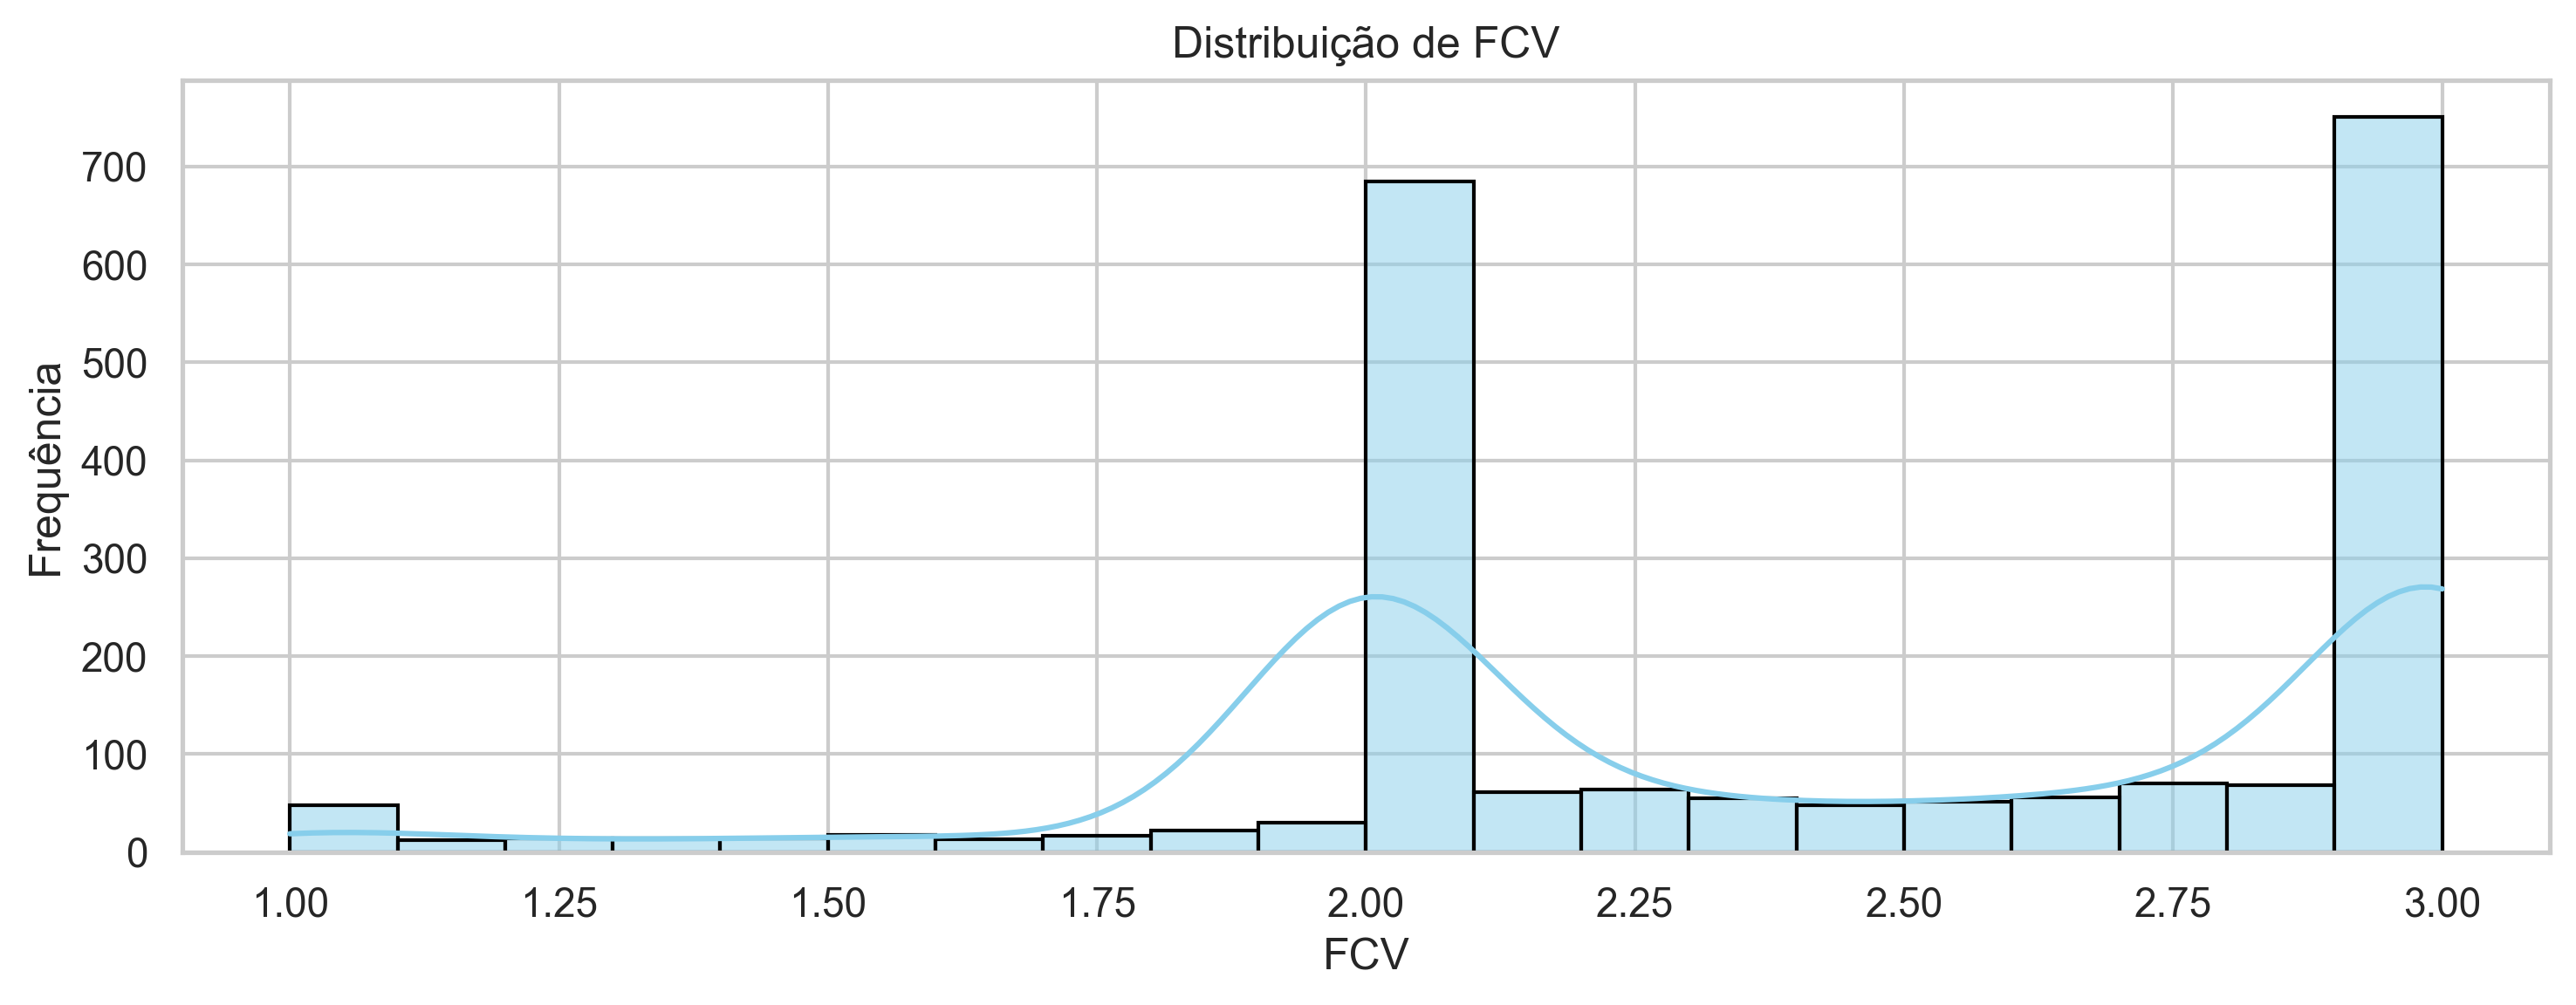

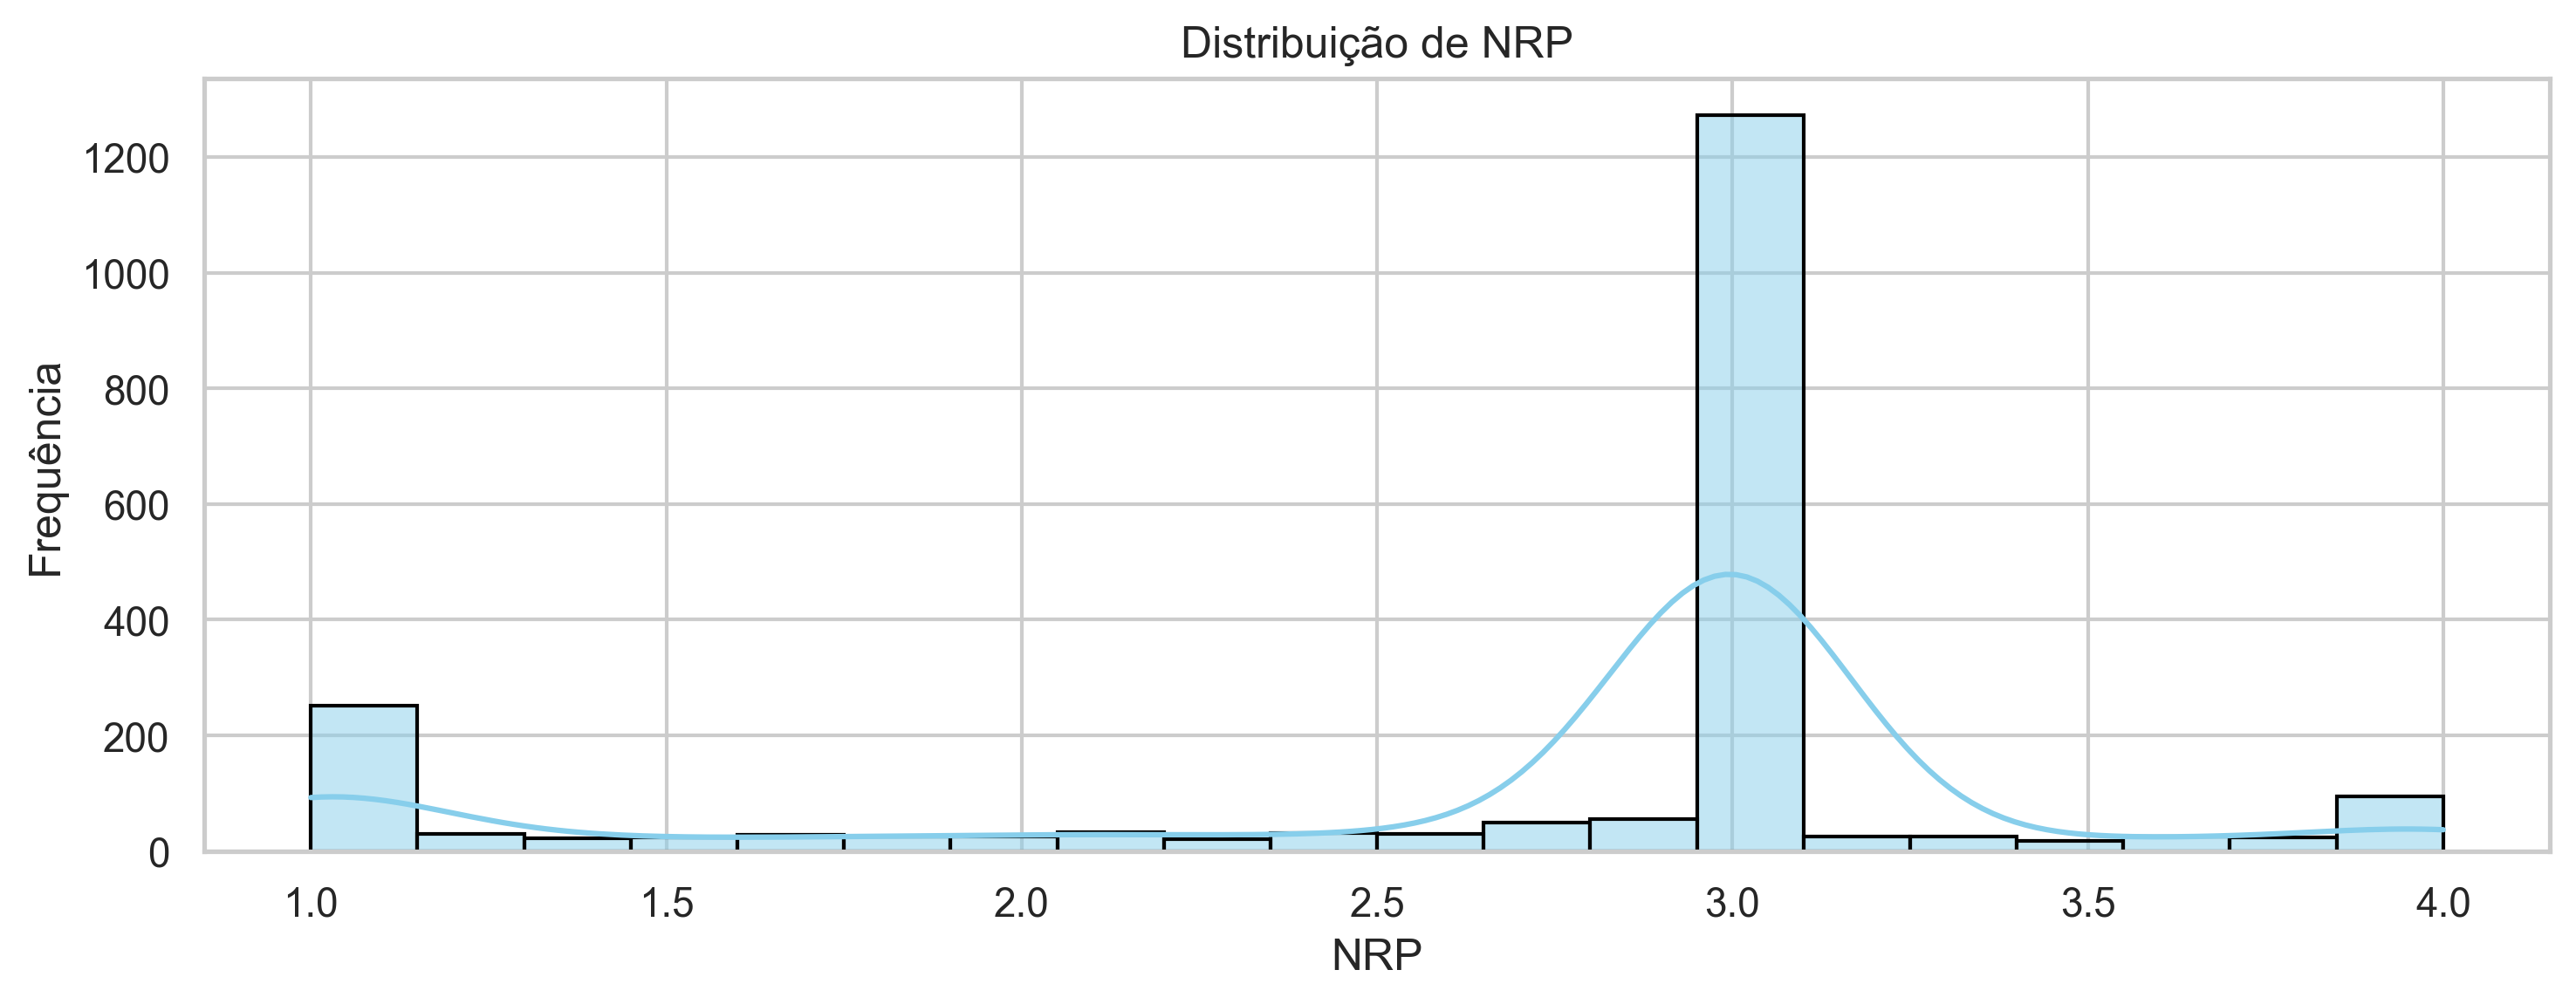

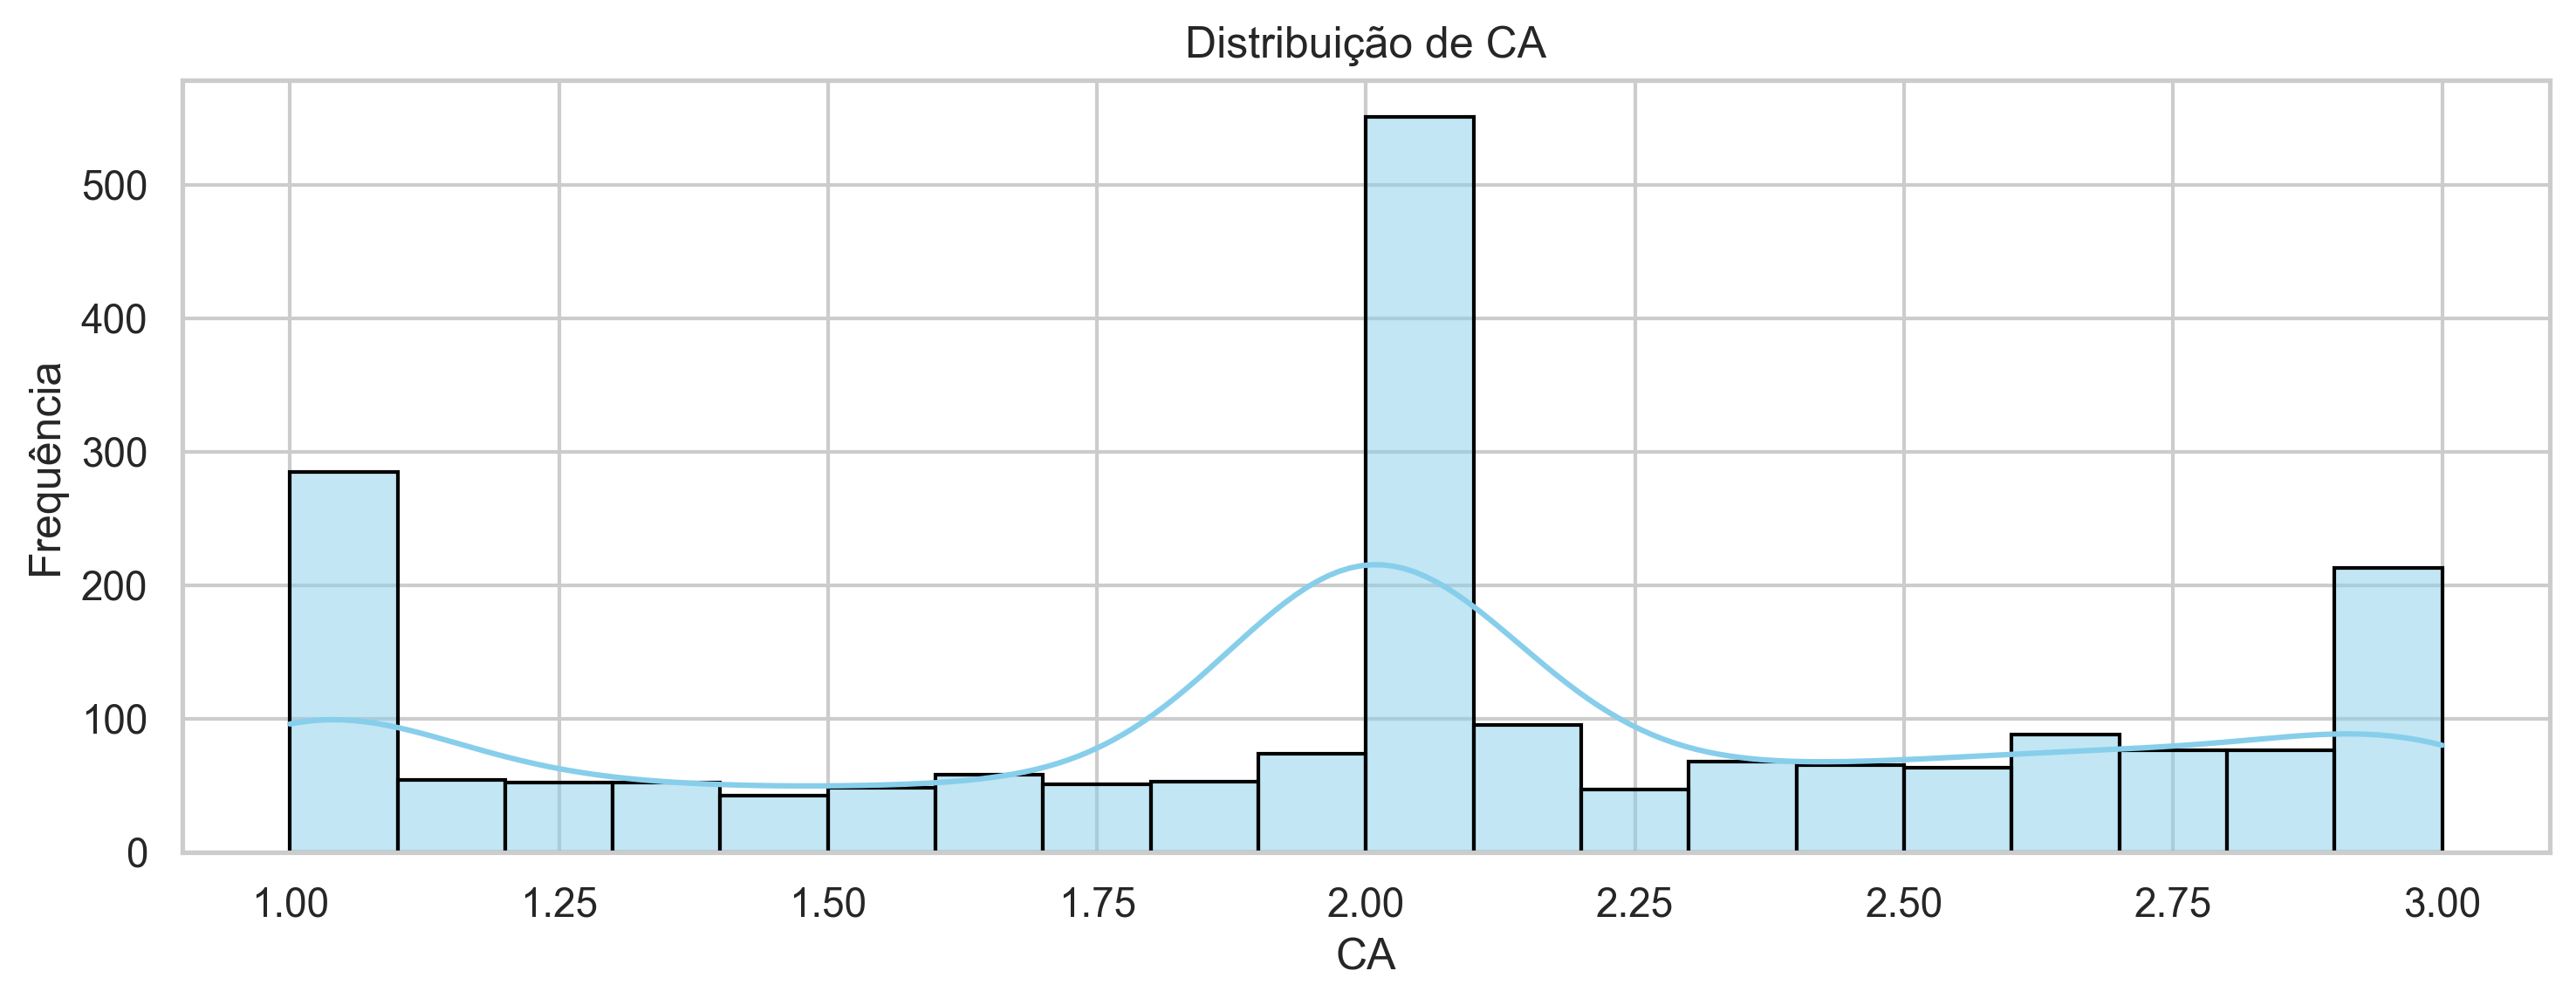

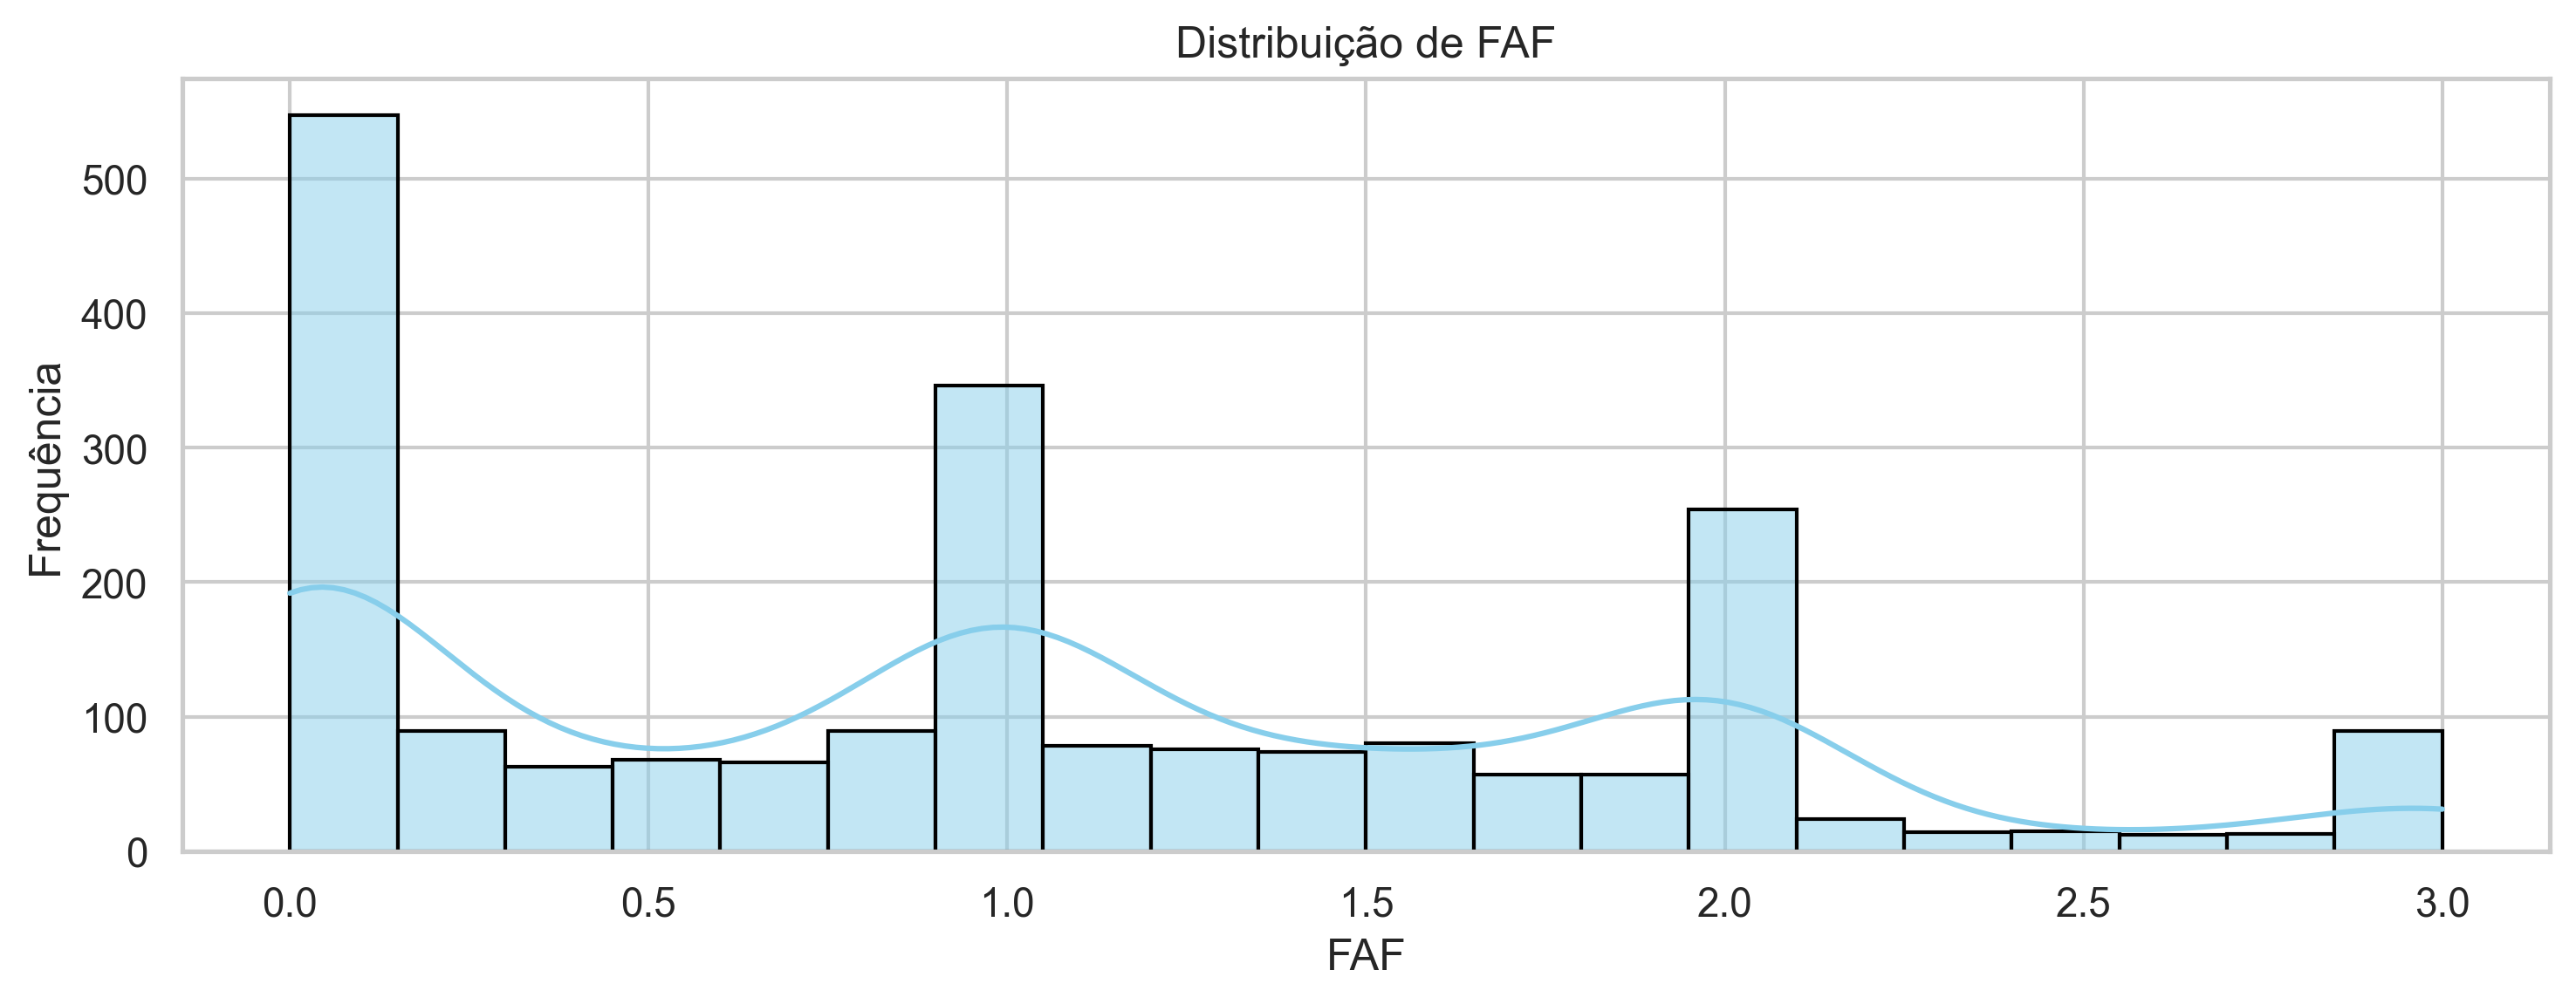

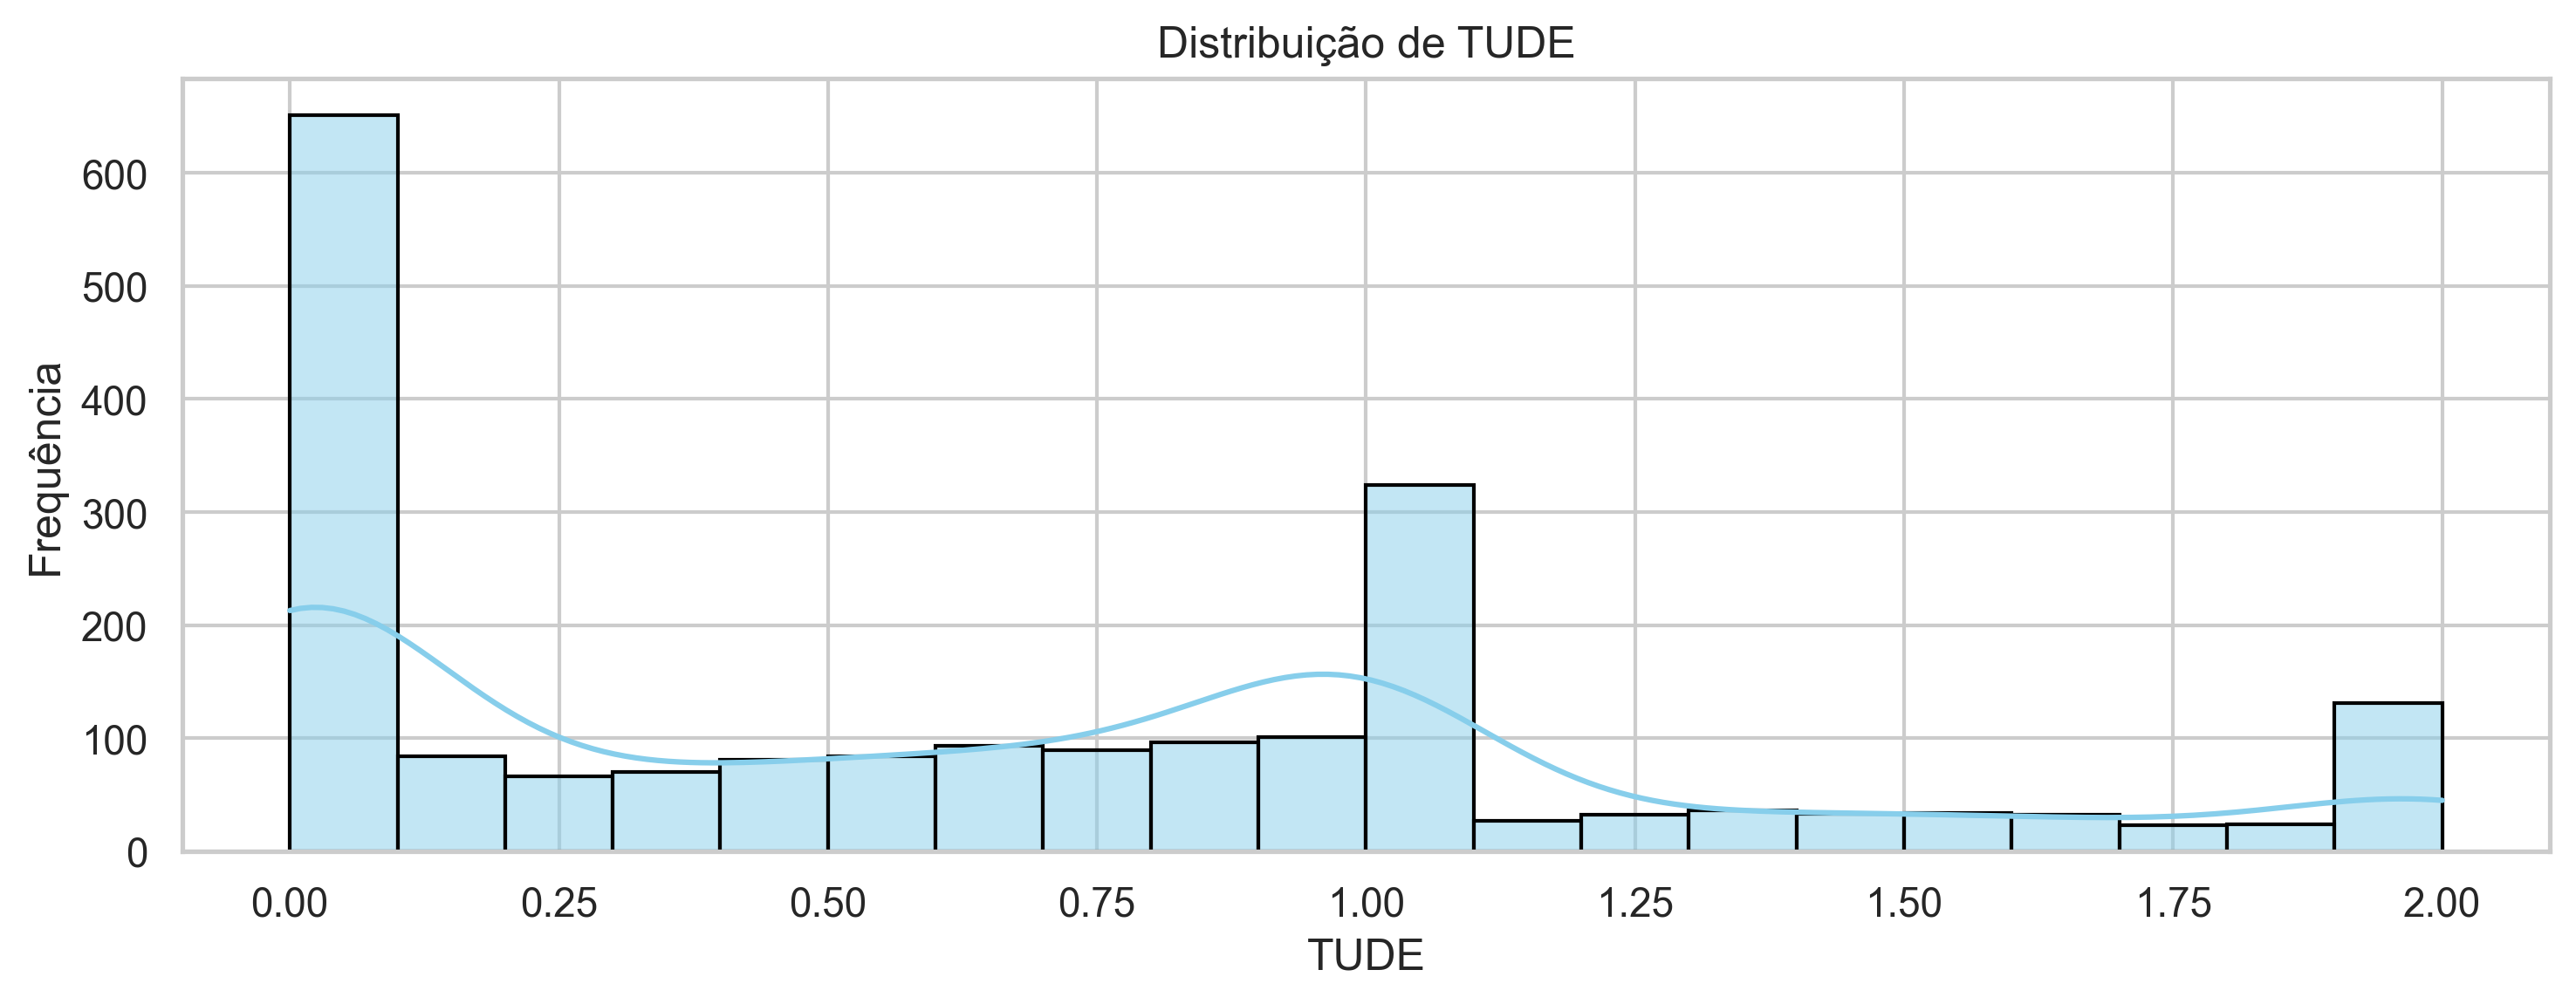

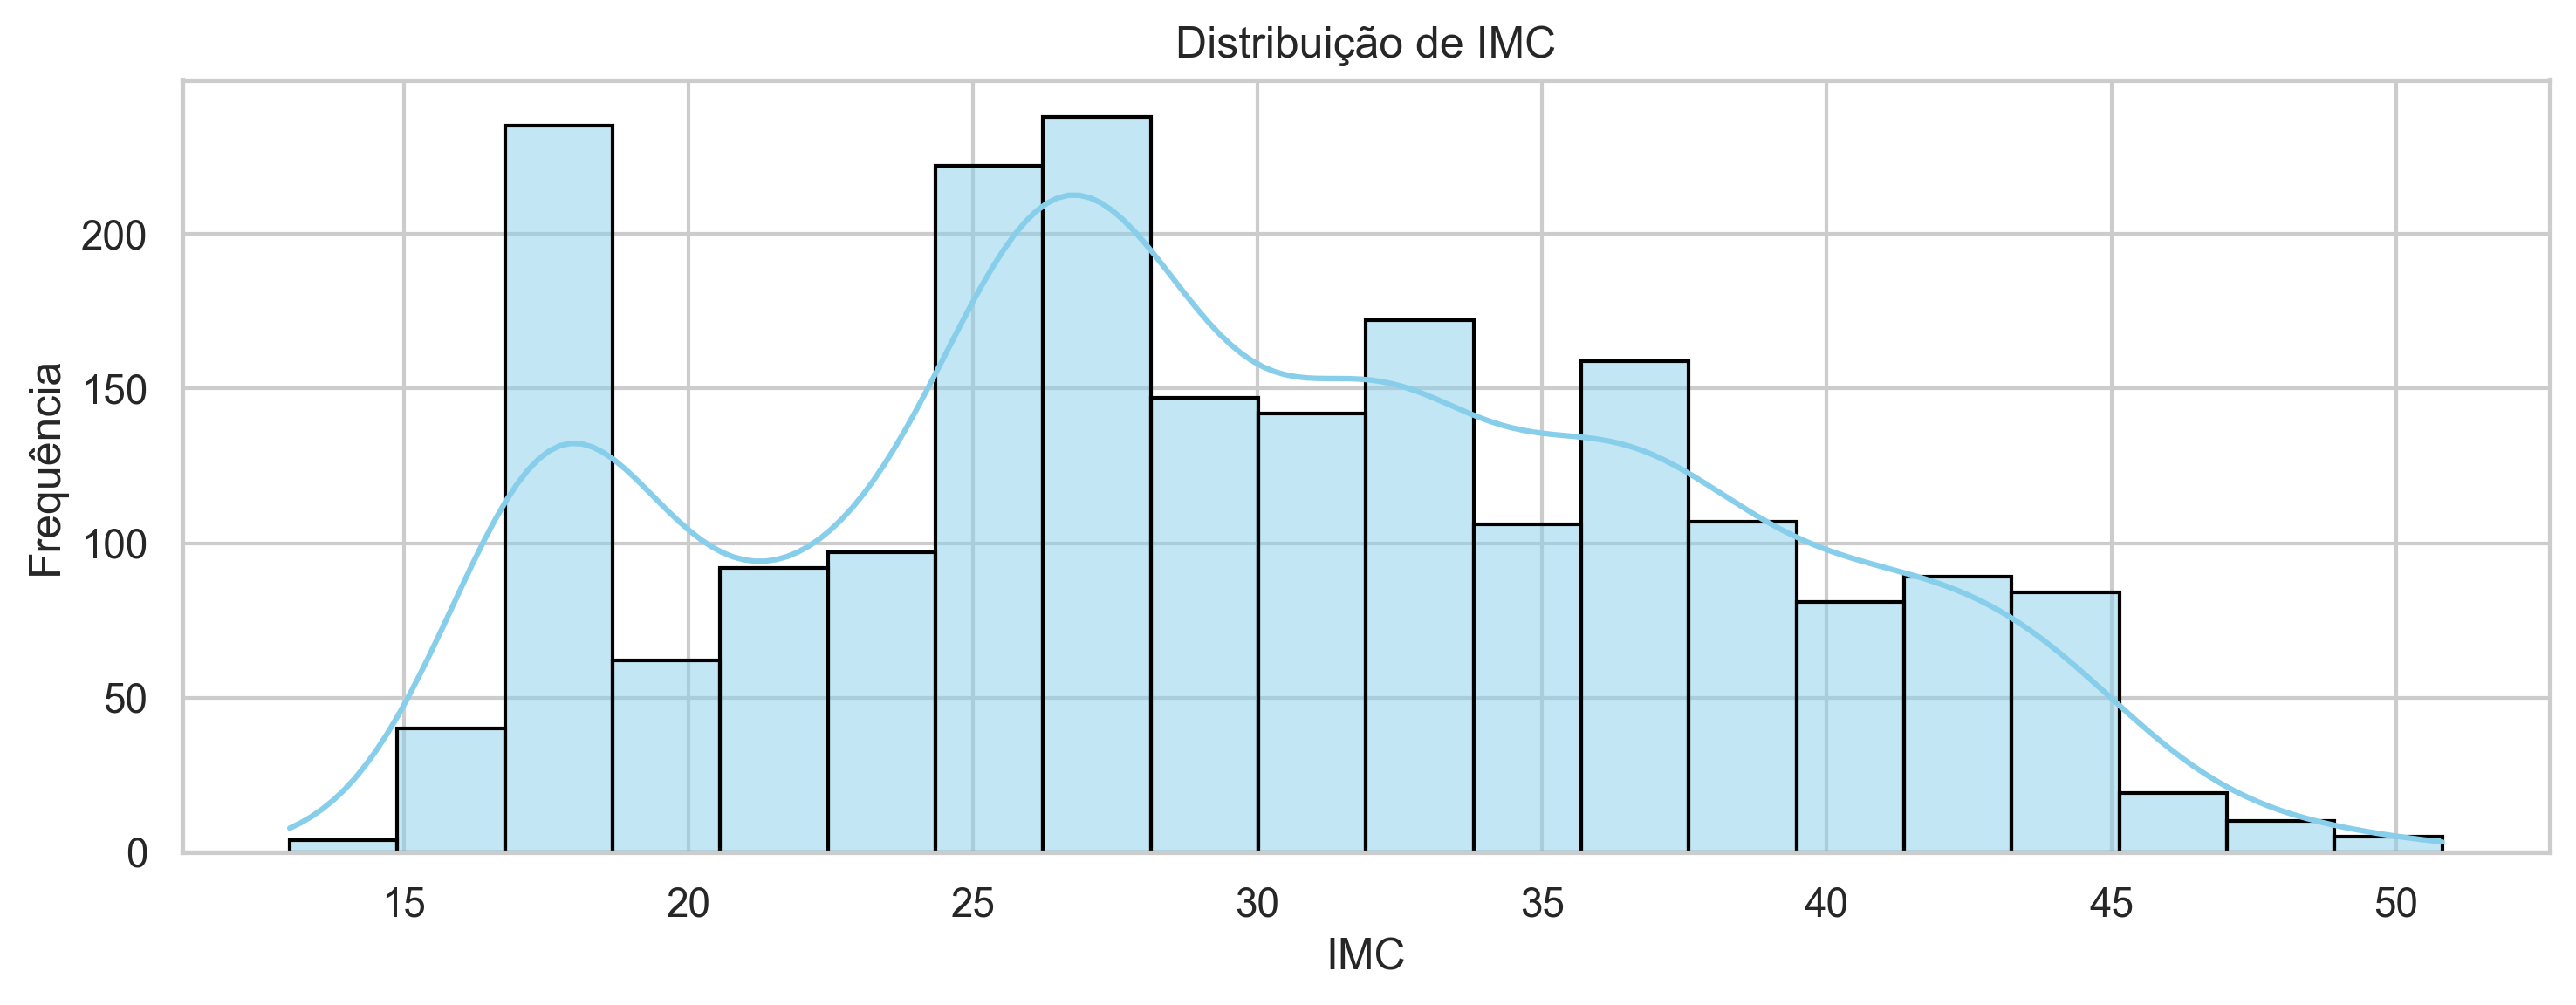

In [23]:
sns.set(style="whitegrid")
hist_columns_plot = ['FCV', 'NRP', 'CA', 'FAF', 'TUDE', 'IMC']

for idx, etiqueta_serie in enumerate(hist_columns_plot):
    histograma(
        dados=dados_trabalho[etiqueta_serie],
        grupos=20,
        kde=True,
        size_x=10,
        size_y=4,
        titulo=f"Distribuição de {etiqueta_serie}",
        etiqueta_x=etiqueta_serie,
        etiqueta_y="Frequência",
        color="skyblue",
        edgecolor="black",
    )


#### Pie Charts

A função ``tarte()`` retorna a ``Fig`` e o ``Axes`` para se poder personalizar mais o gráfico.
É também possível passar parâmetros adicionais (*kwargs*), os quais serão usados na invocação de ``pie()``. 

(<Figure size 1500x1500 with 1 Axes>, <Axes: >)

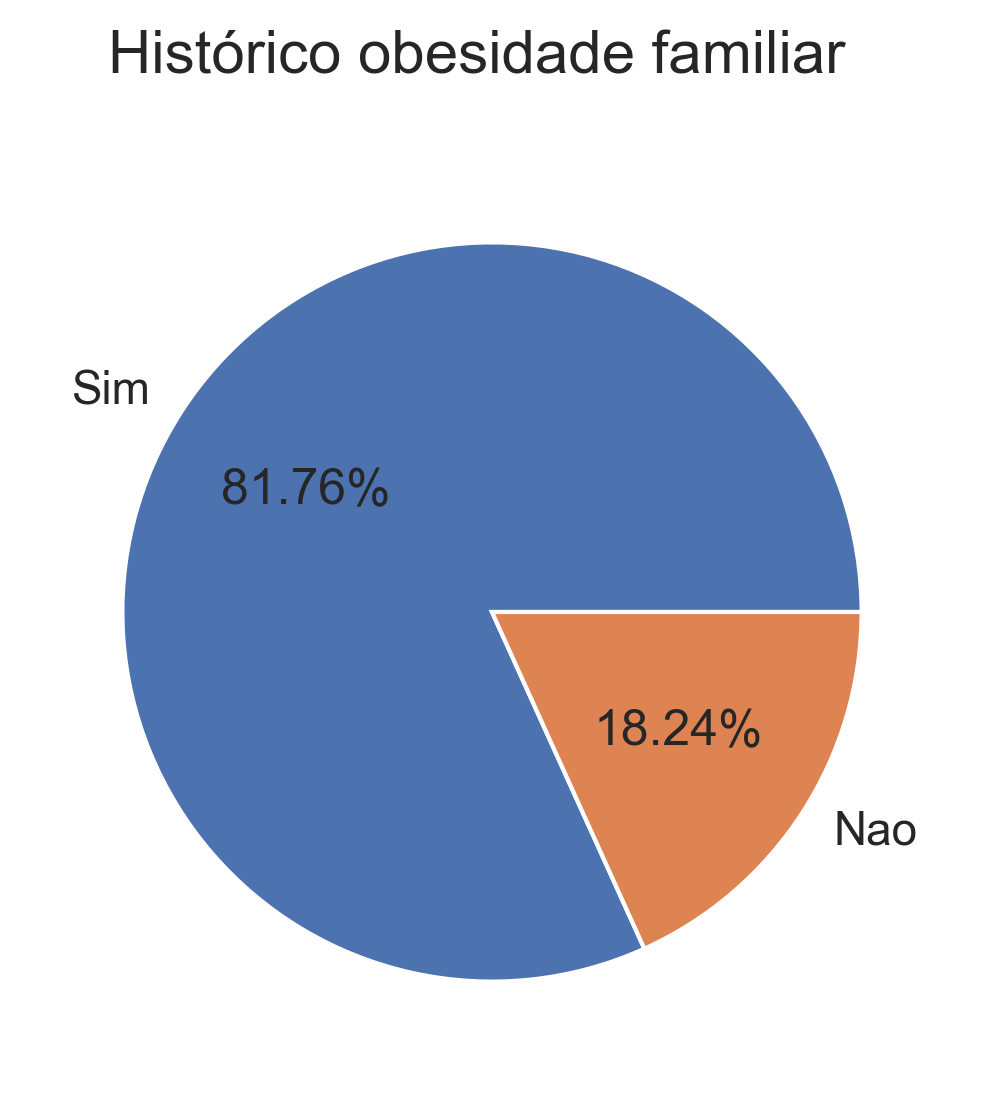

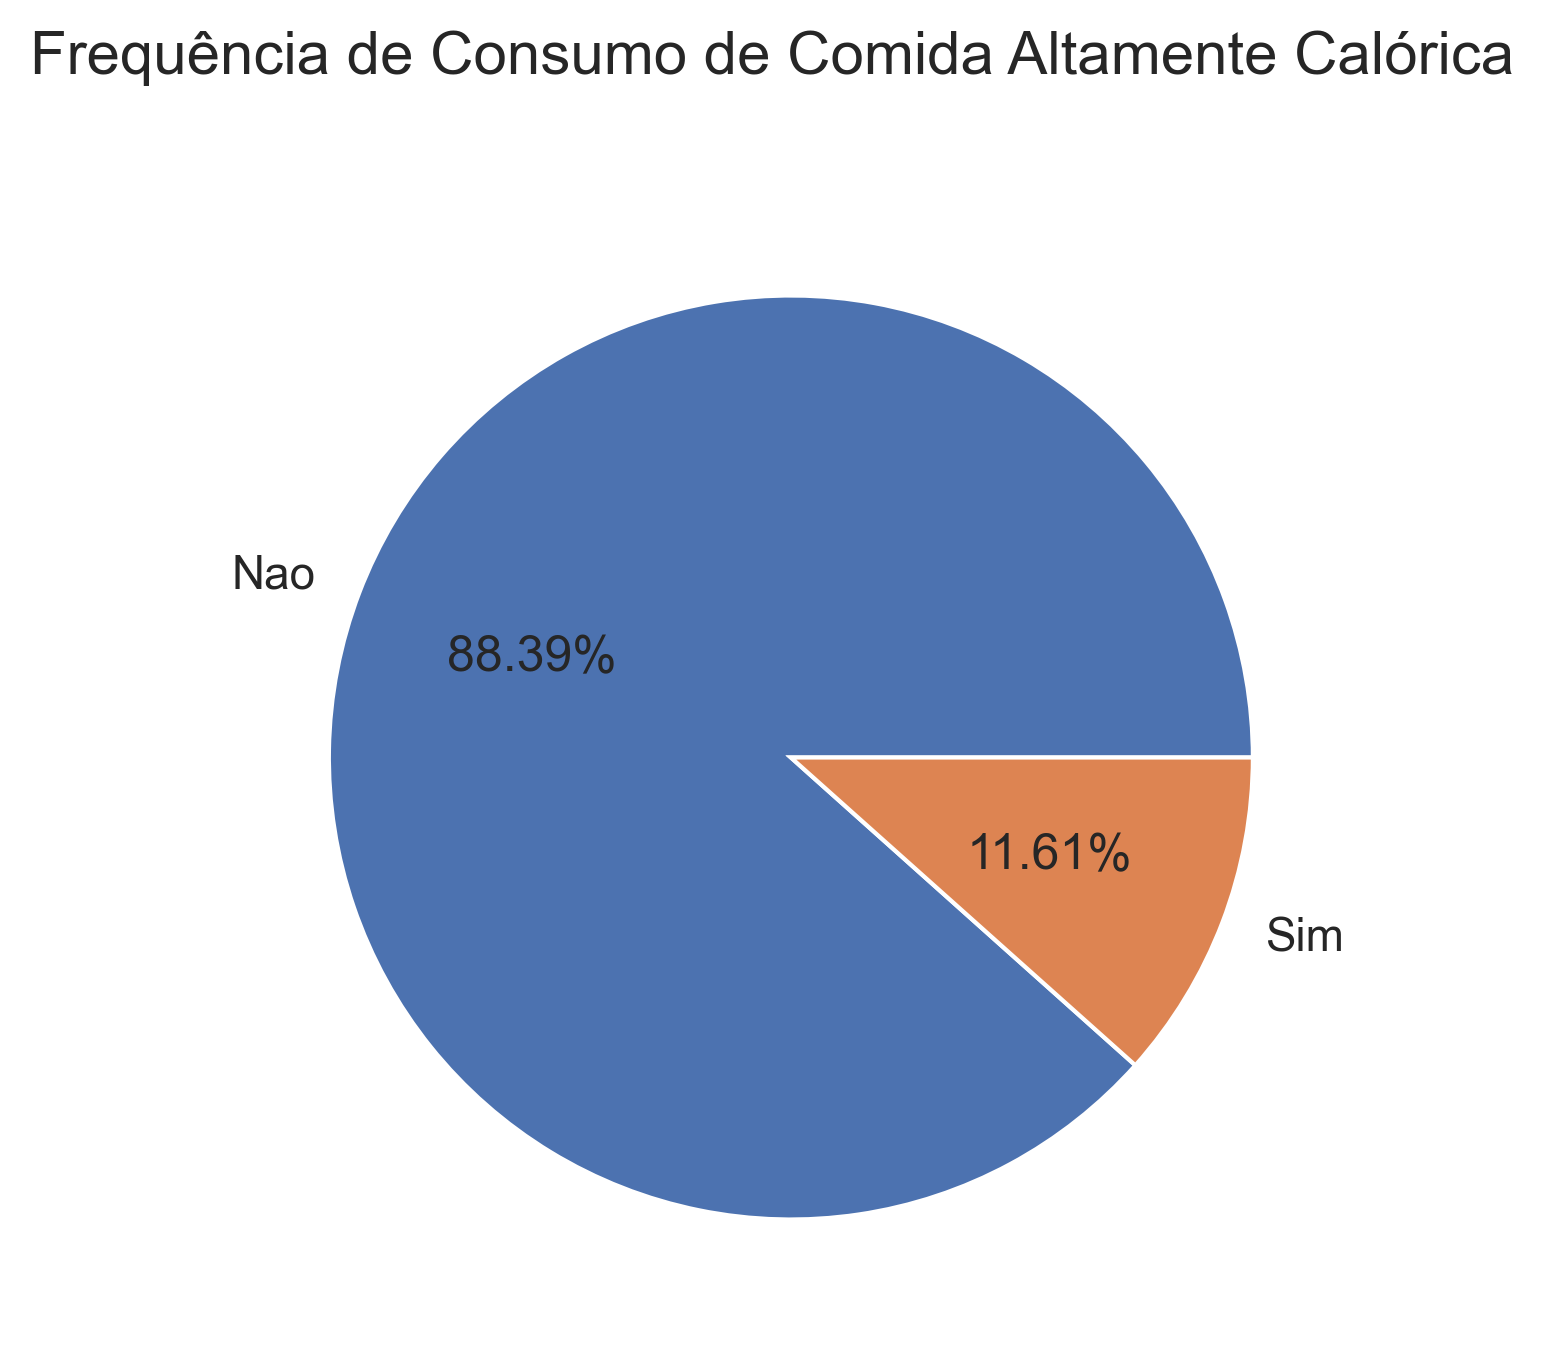

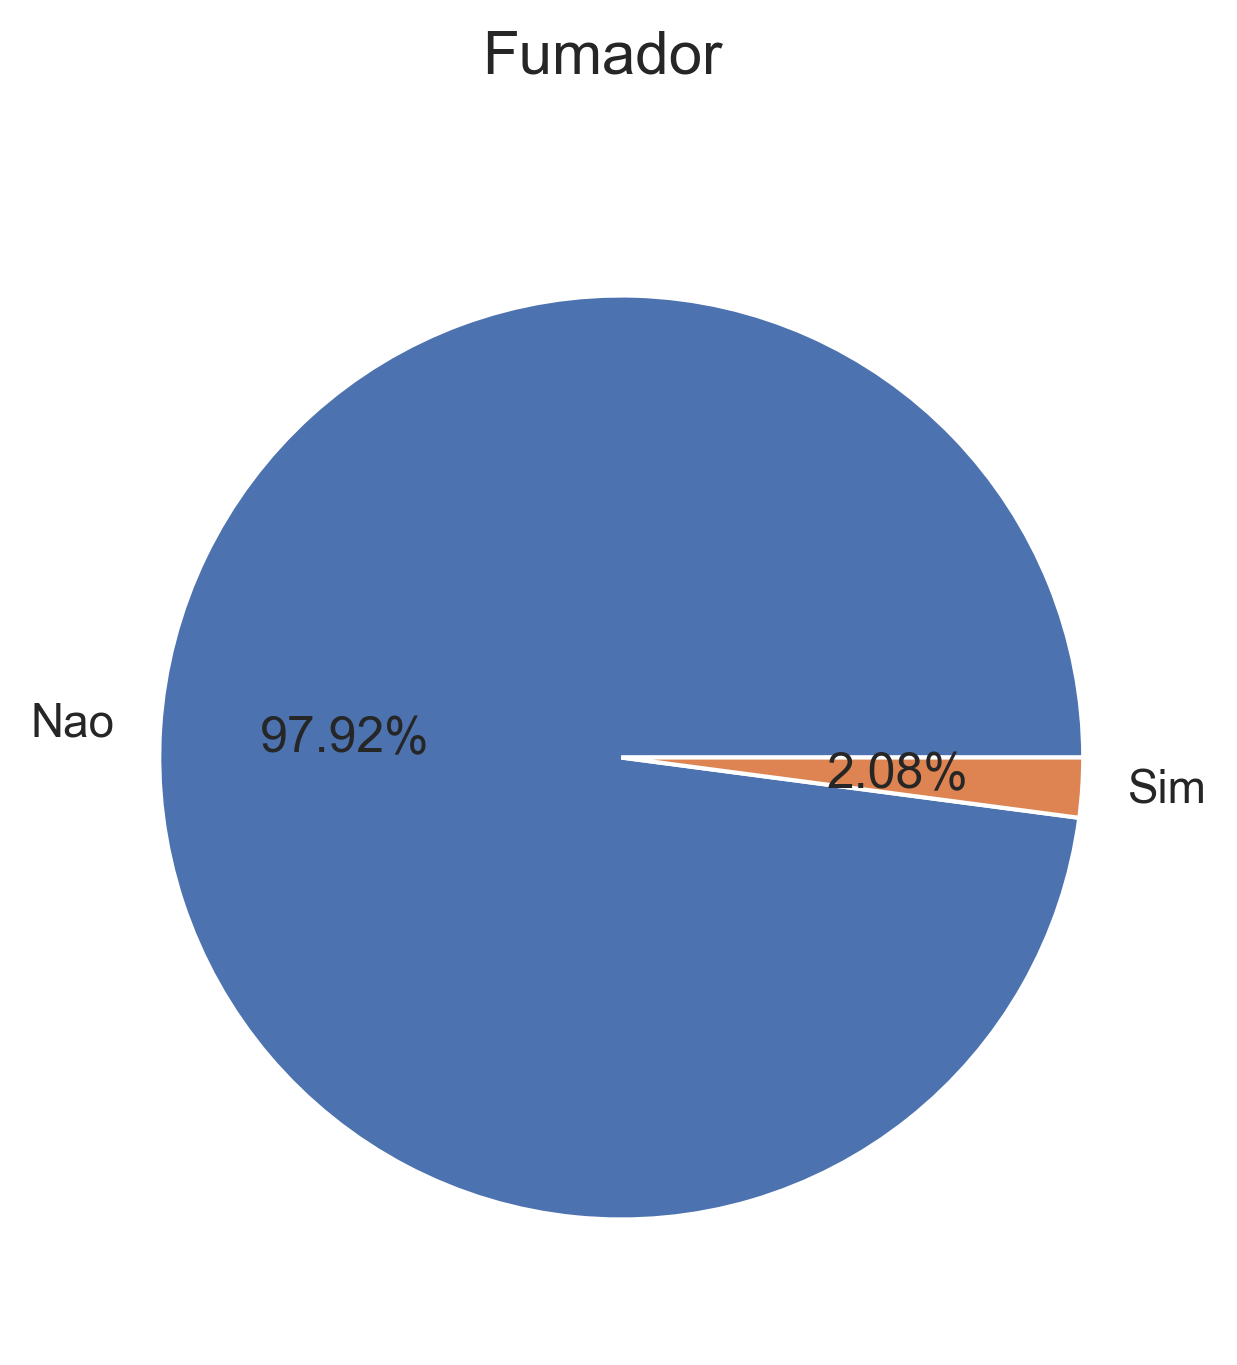

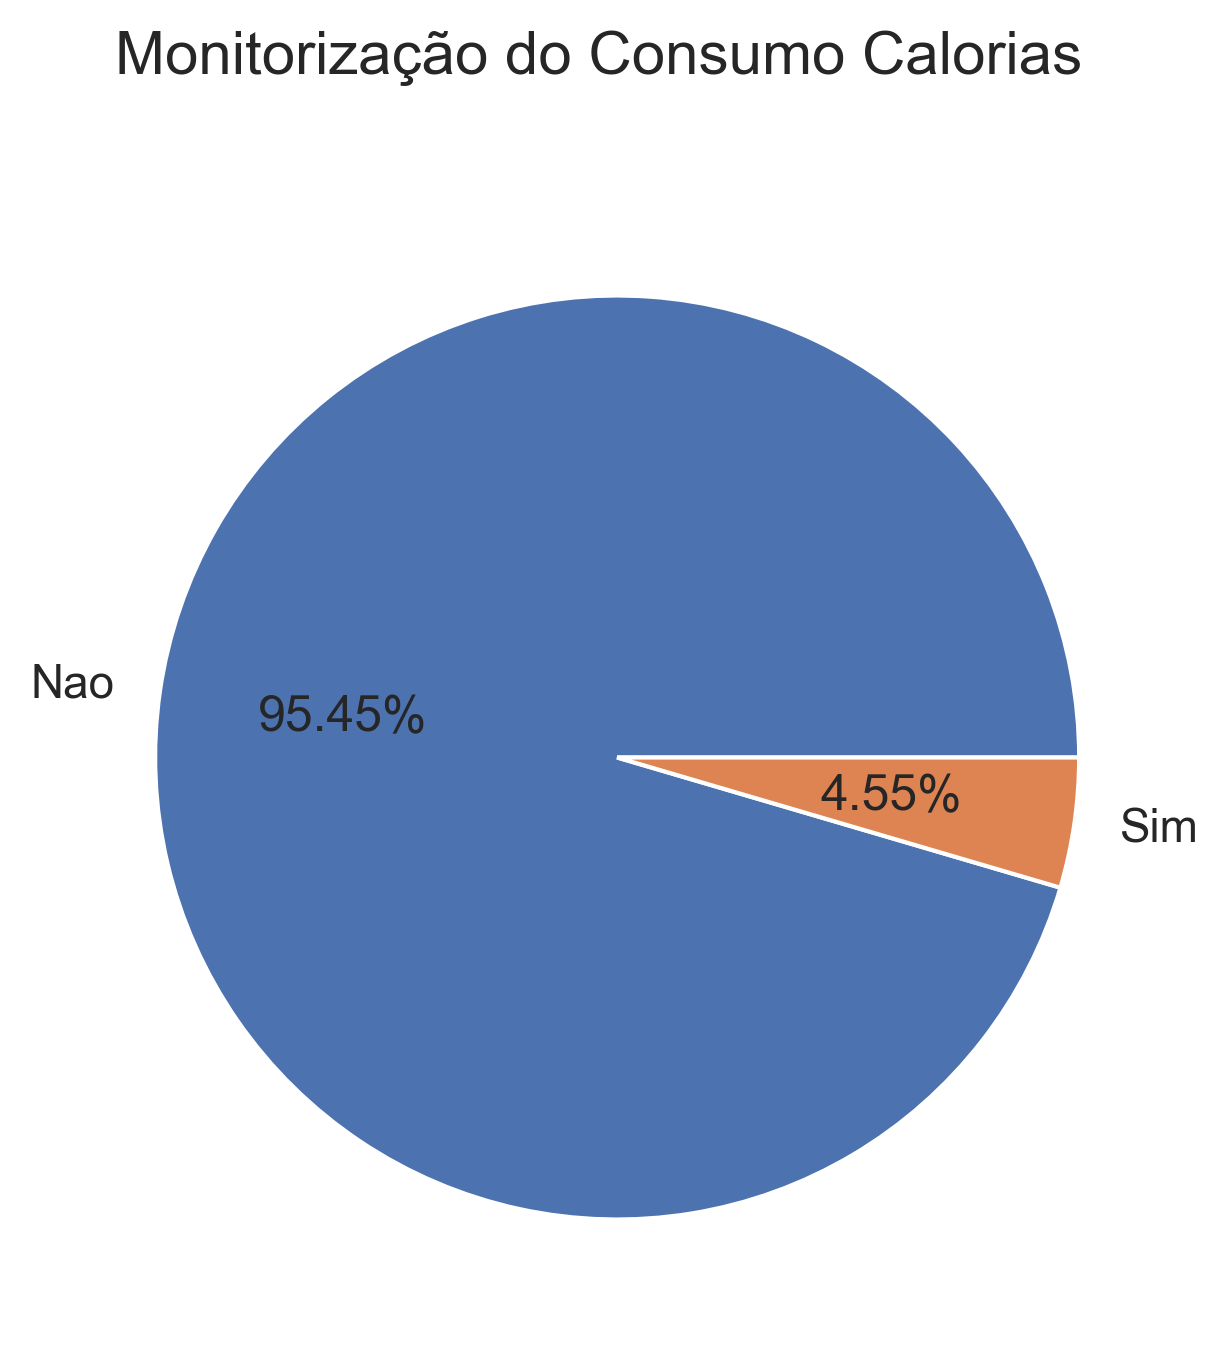

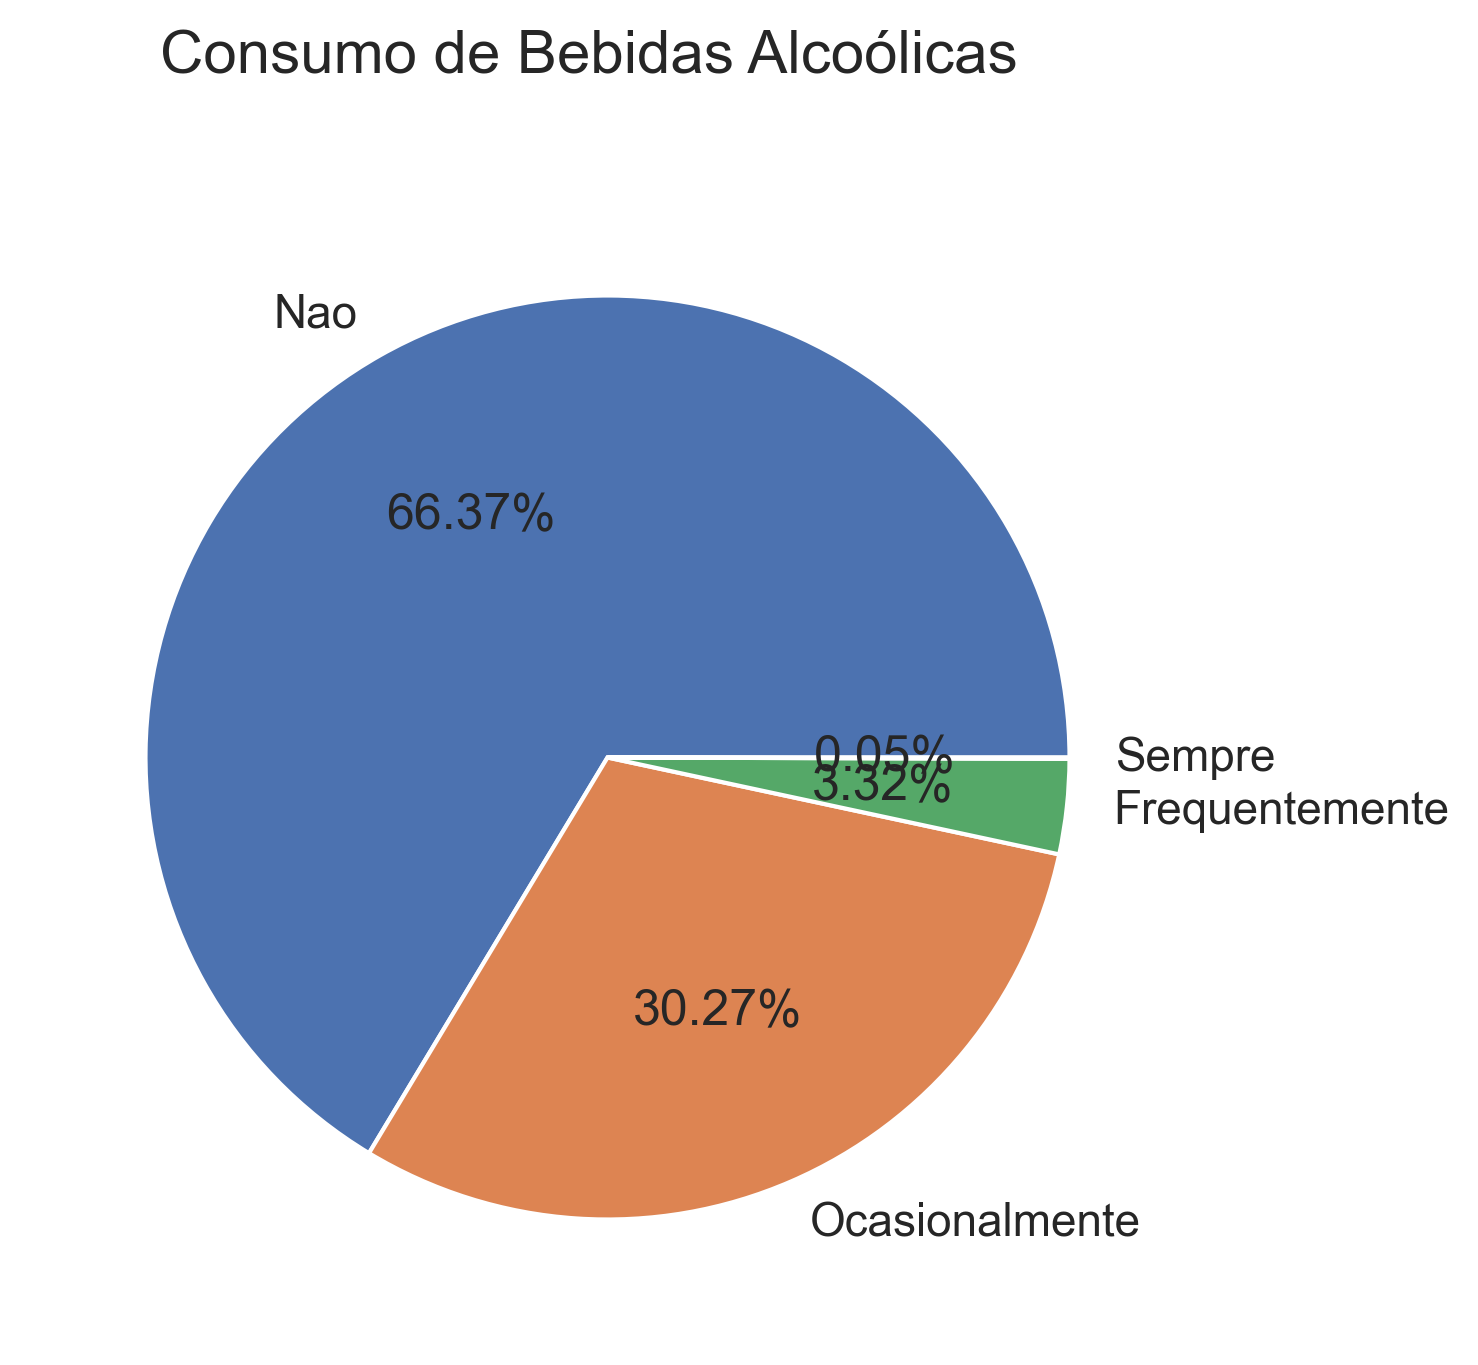

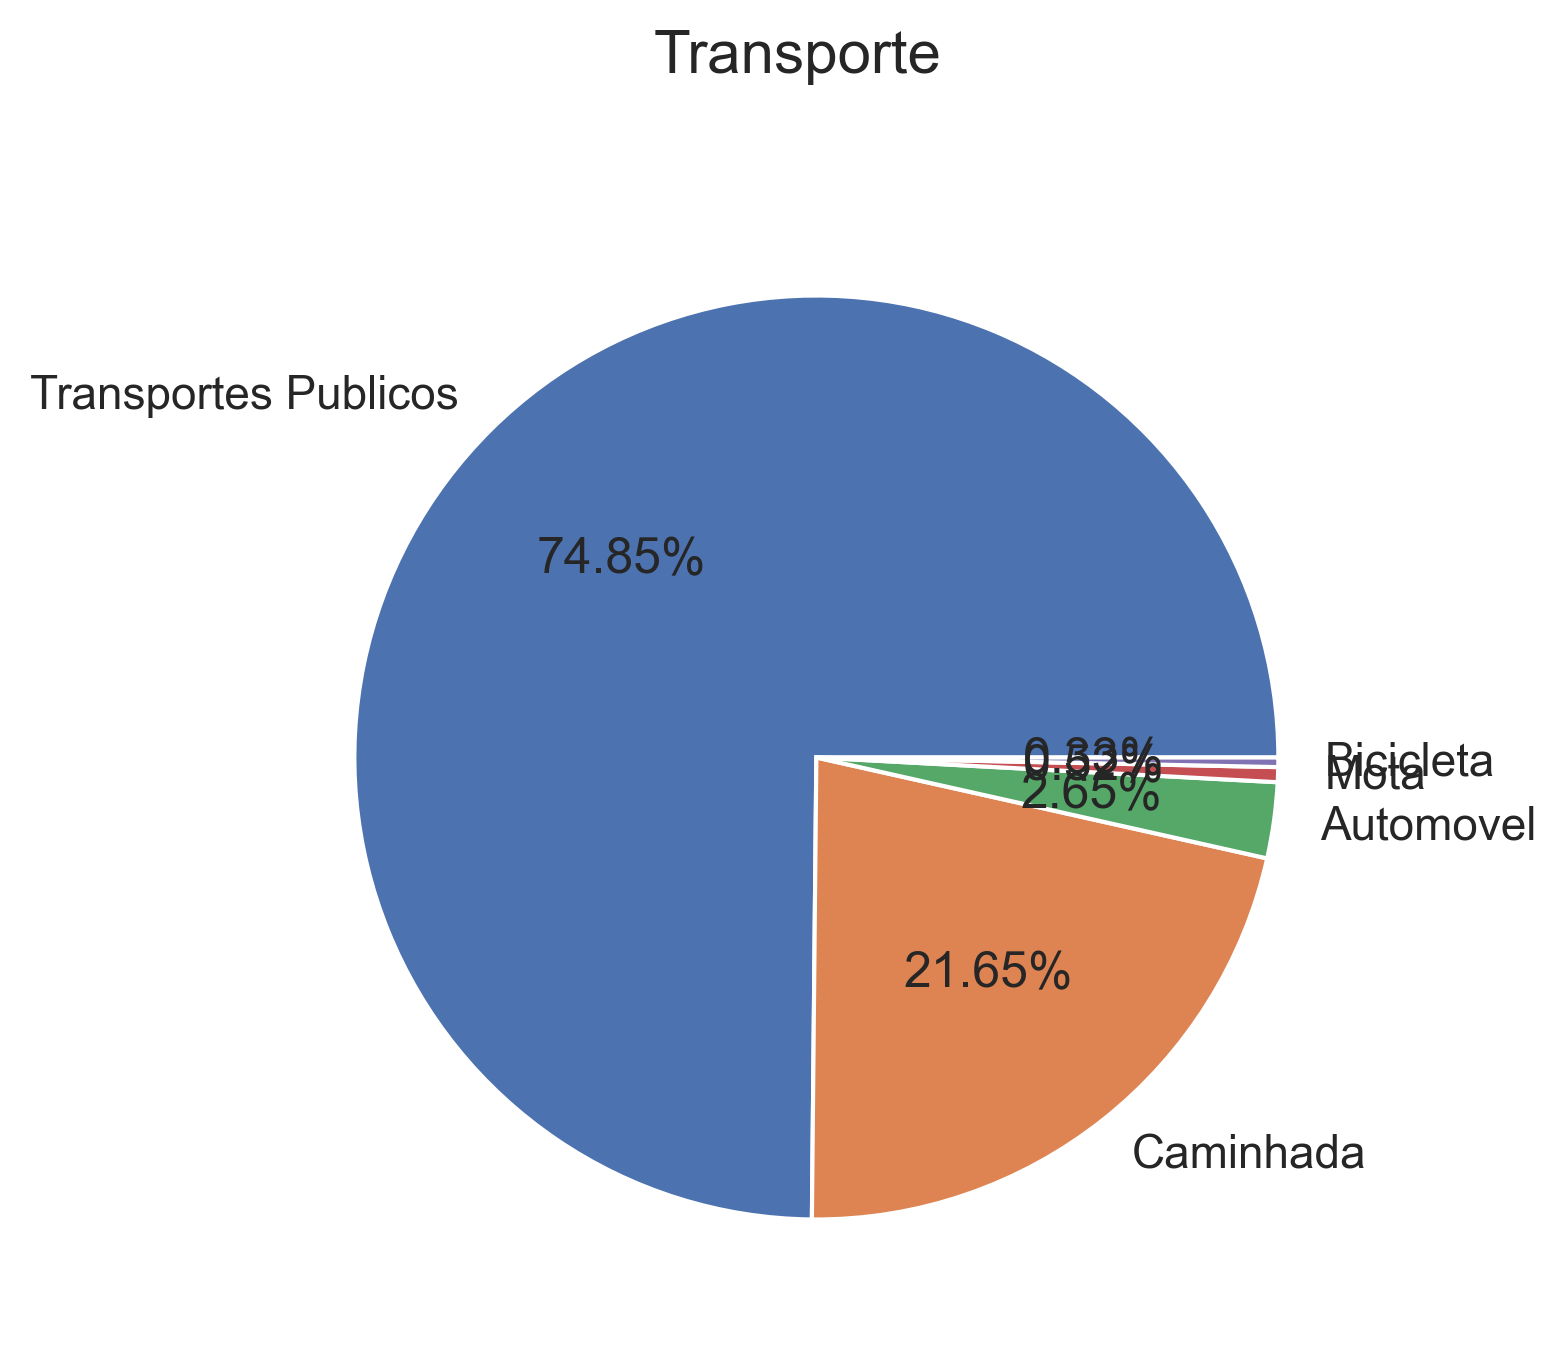

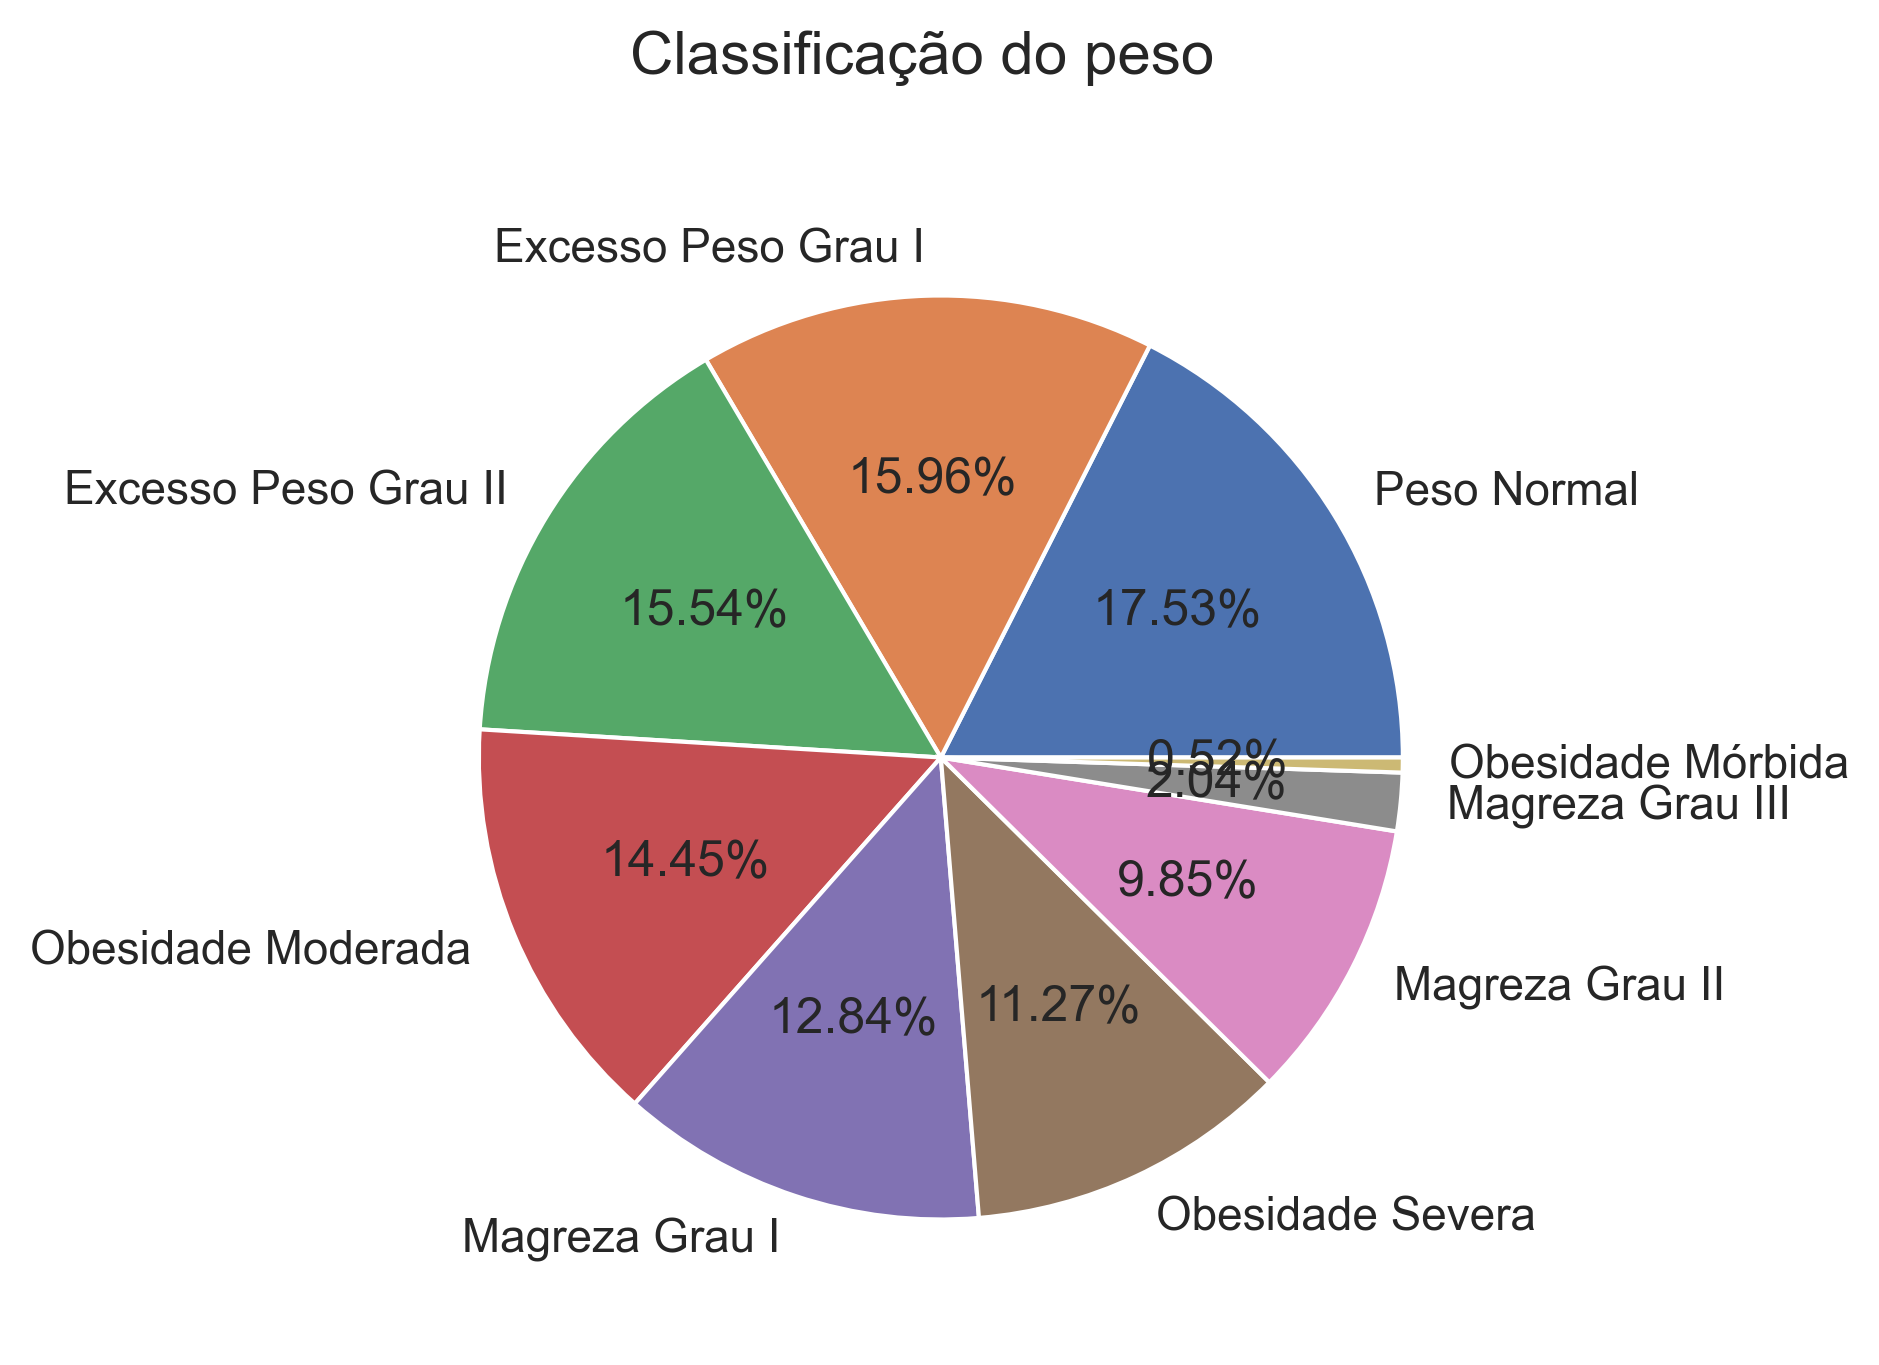

In [24]:
tarte(
    dados=dados_trabalho["Historico_obesidade_familiar"].value_counts(),
    size_x=4,
    size_y=4,
    titulo="Histórico obesidade familiar",
    labels=dados_lidos["Historico_obesidade_familiar"].unique(),
)

tarte(
    dados=dados_trabalho["FCCAC"].value_counts(),
    size_x=5,
    size_y=5,
    titulo="Frequência de Consumo de Comida Altamente Calórica",
    labels=dados_lidos["FCCAC"].unique(),
)

tarte(
    dados=dados_trabalho["Fumador"].value_counts(),
    size_x=5,
    size_y=5,
    titulo="Fumador",
    labels=dados_lidos["Fumador"].unique(),
)

tarte(
    dados=dados_trabalho["MCC"].value_counts(),
    size_x=5,
    size_y=5,
    titulo="Monitorização do Consumo Calorias",
    labels=dados_lidos["MCC"].unique(),
)

tarte(
    dados=dados_trabalho["CBA"].value_counts(),
    size_x=5,
    size_y=5,
    titulo="Consumo de Bebidas Alcoólicas",
    labels=dados_lidos["CBA"].unique(),
)

tarte(
    dados=dados_trabalho["TRANS"].value_counts(),
    size_x=5,
    size_y=5,
    titulo="Transporte",
    labels=[undersplit(texto) for texto in dados_lidos["TRANS"].unique()],
)

tarte(
    dados=dados_trabalho["Label"].value_counts(),
    size_x=5,
    size_y=5,
    titulo="Classificação do peso",
    labels=[undersplit(texto) for texto in dados_lidos["Label"].unique()],
)

#### visualização de outliers

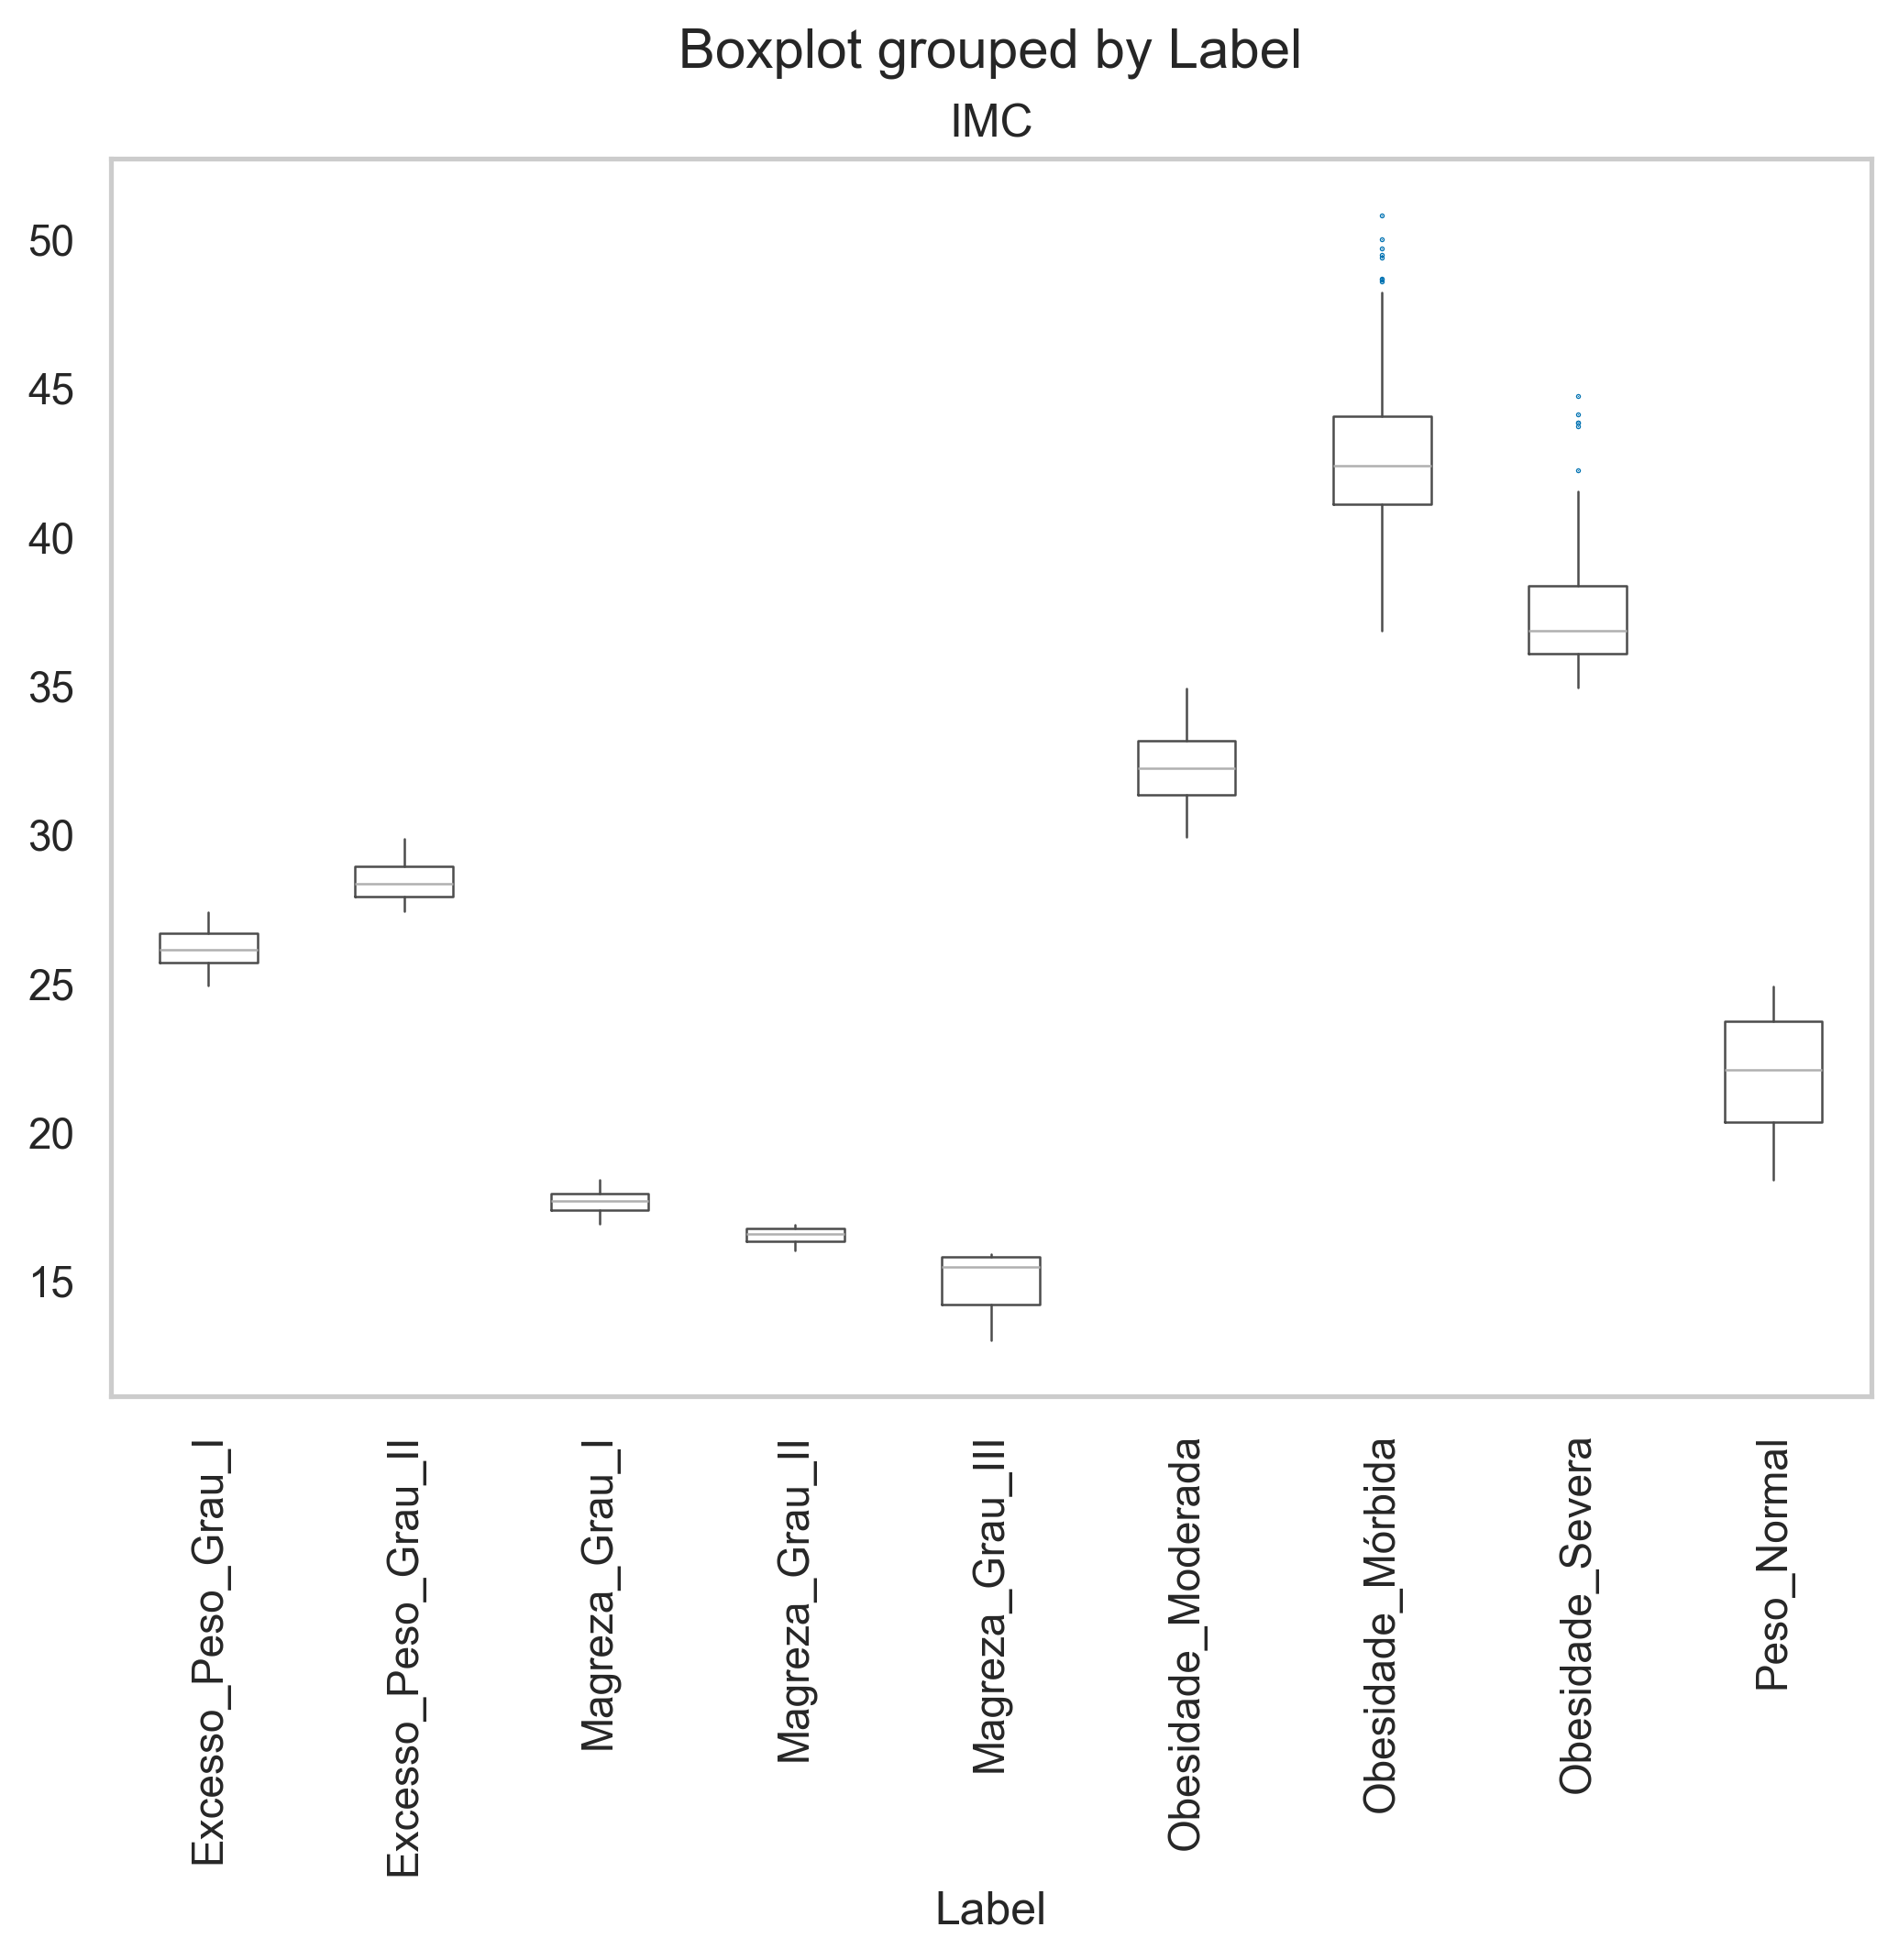

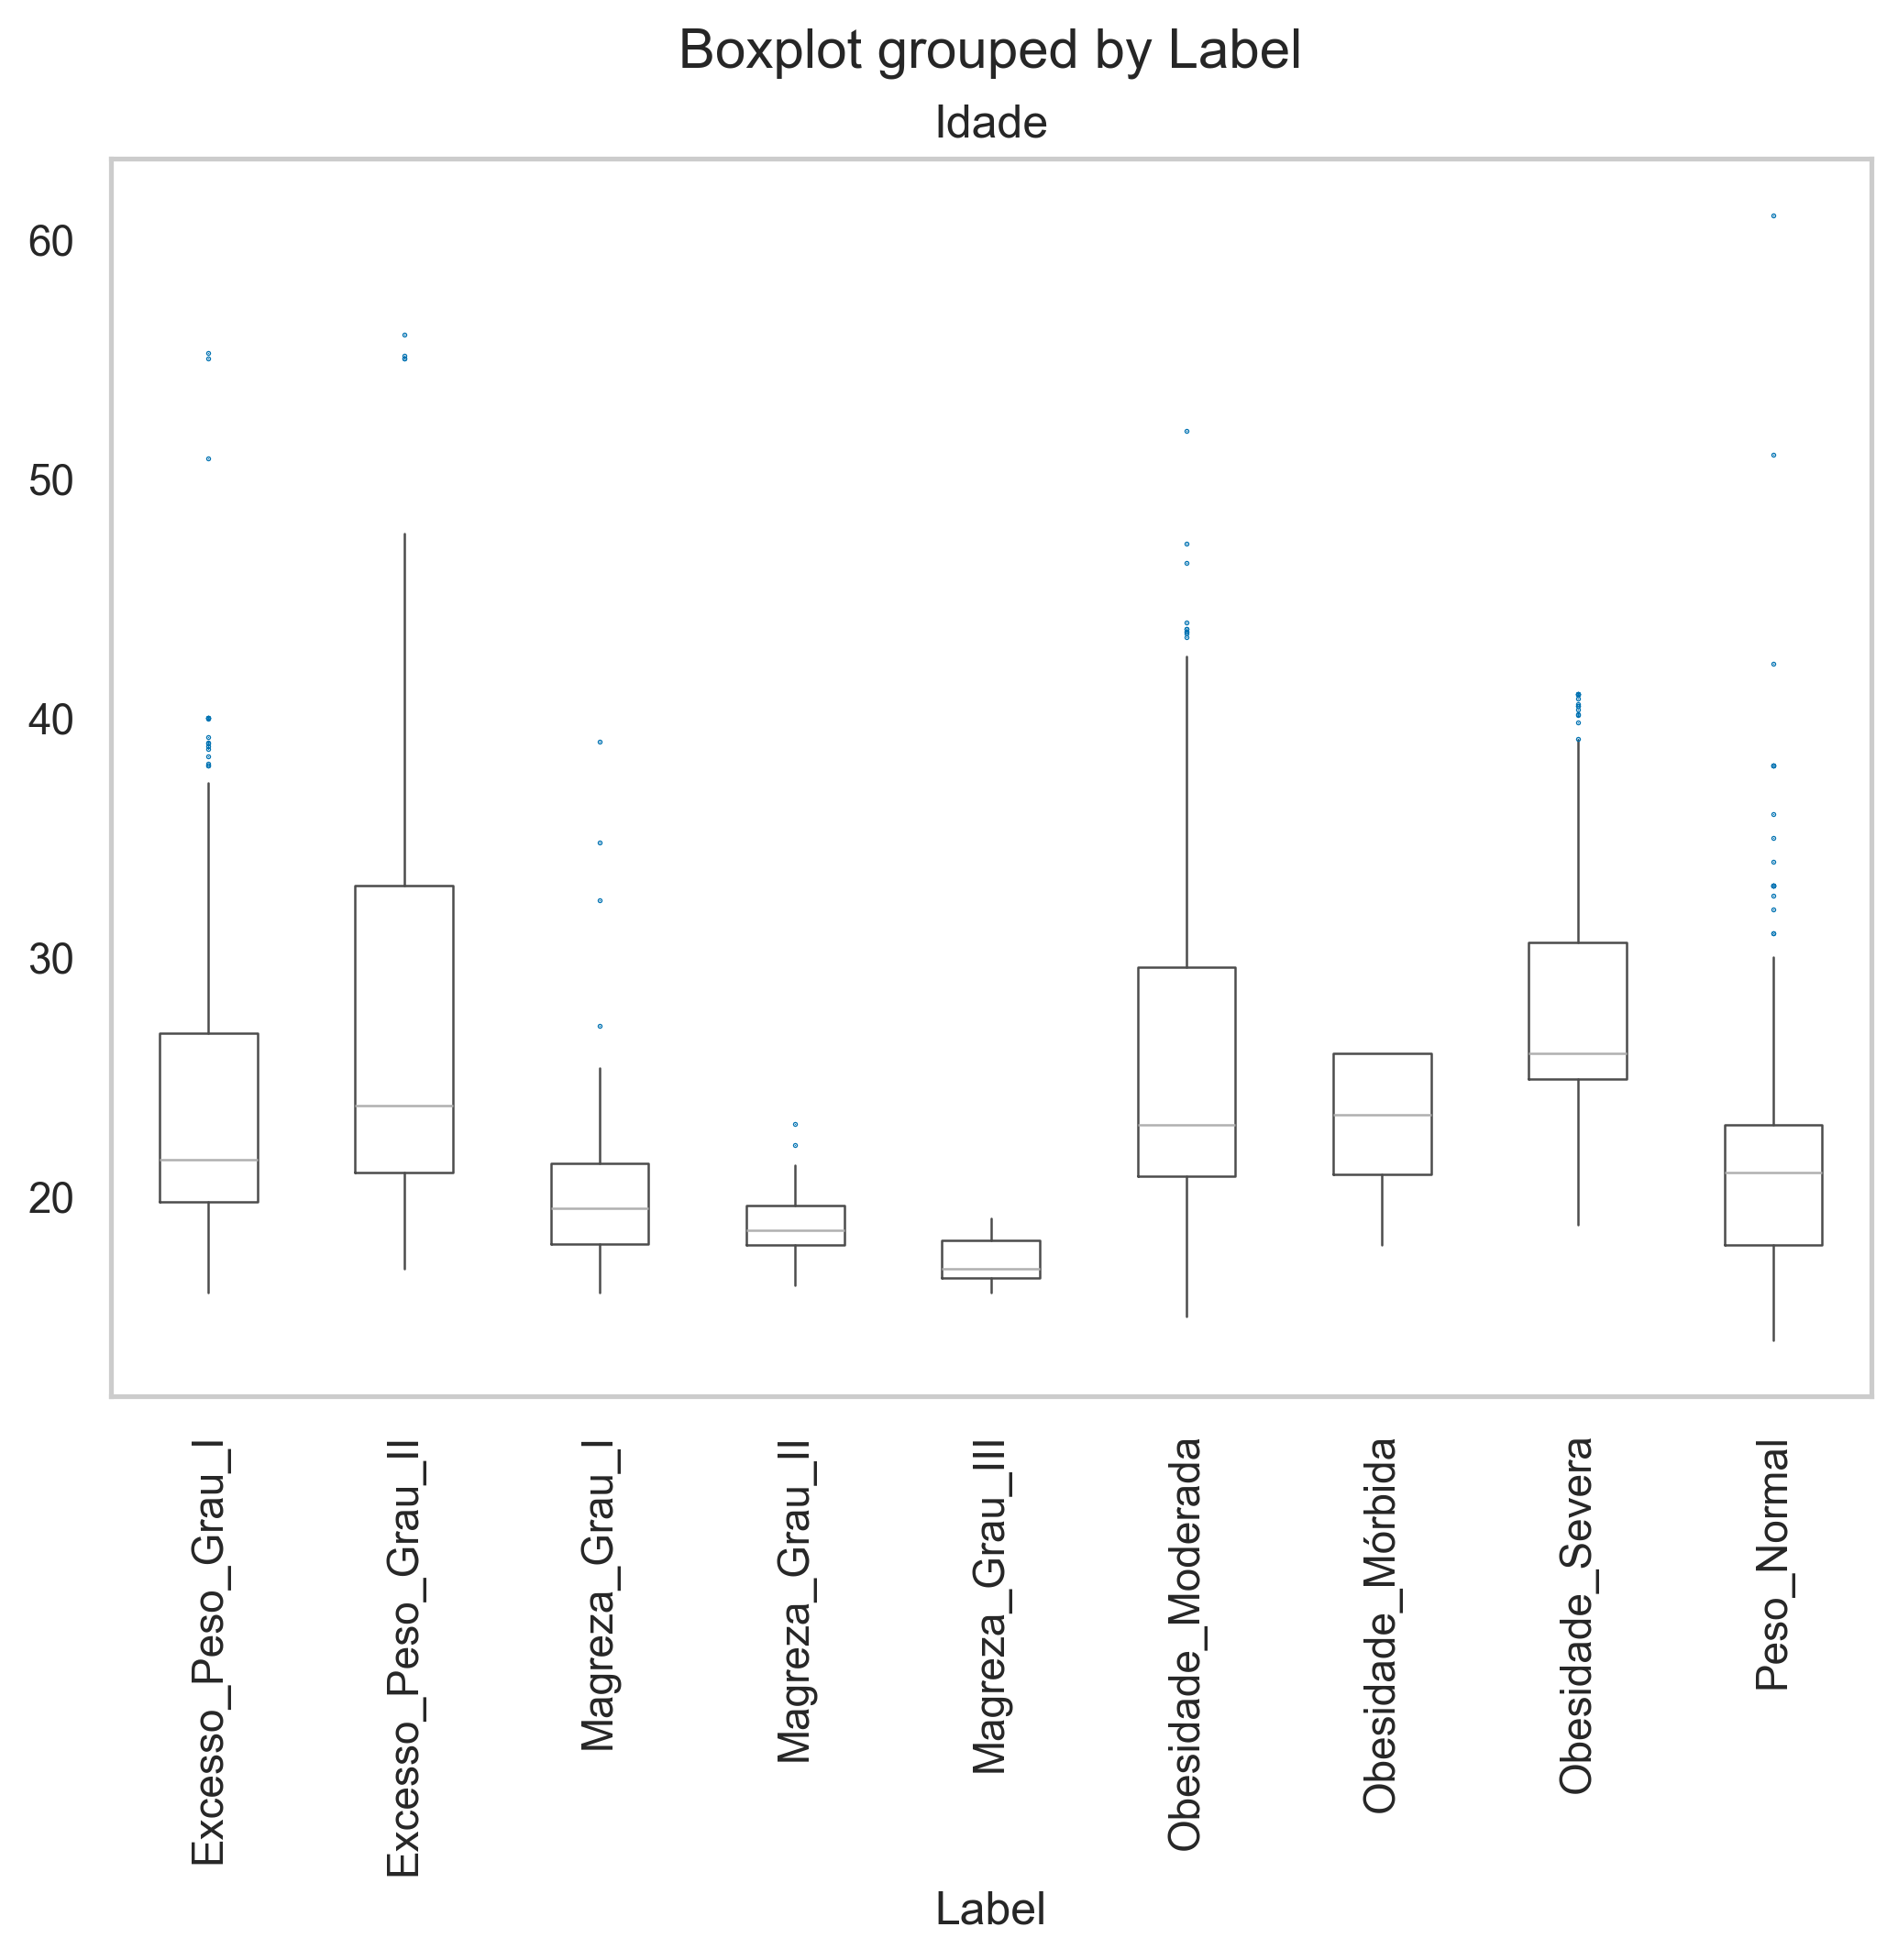

In [25]:
boxplots_colunas = ["IMC", "Idade"]

for coluna in boxplots_colunas:
    if (dados_trabalho[coluna].dtype != 'object'):
        dados_trabalho.boxplot(
            column=[coluna],
            by="Label",
            grid=False,
            figsize=(8, 6),
            return_type="dict",
            rot=90,
        )
        plt.title(coluna)

plt.show()

### 4.1.4

#### a) Identificação de NAN e "limpar" o dataset.

Verificar se existem valores nulos.

In [26]:
dados_trabalho[dados_trabalho.isnull().any(axis=1)]

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC


Verificar se existem valores NaN

In [27]:
dados_trabalho[dados_trabalho.isna().any(axis=1)]

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC


#### Guardar uma cópia dos dados

Vamos guardar a cópia dos dados de trabalho antes de se avançar com a preparação dos dados, para a sua utilização da tabela de correlação que vai ser feita no *4.1.5*, assim como o gráfico da Regressão linear no *4.1.6 b)*.

In [28]:
dados_corr = dados_trabalho.copy()
dados_bruto = dados_trabalho.copy()
dados_corr

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
0,Feminino,21.000000,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.000000,Nao,0.000000,1.000000,Nao,Transportes_Publicos,Peso_Normal,24.386526
1,Feminino,21.000000,Sim,Nao,3.0,3.0,Ocasionalmente,Sim,3.000000,Sim,3.000000,0.000000,Ocasionalmente,Transportes_Publicos,Peso_Normal,24.238227
2,Masculino,23.000000,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.000000,Nao,2.000000,1.000000,Frequentemente,Transportes_Publicos,Peso_Normal,23.765432
3,Masculino,27.000000,Nao,Nao,3.0,3.0,Ocasionalmente,Nao,2.000000,Nao,2.000000,0.000000,Frequentemente,Caminhada,Excesso_Peso_Grau_I,26.851852
4,Masculino,22.000000,Nao,Nao,2.0,1.0,Ocasionalmente,Nao,2.000000,Nao,0.000000,0.000000,Ocasionalmente,Transportes_Publicos,Excesso_Peso_Grau_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Feminino,20.976842,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,1.728139,Nao,1.676269,0.906247,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,44.901475
2107,Feminino,21.982942,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.005130,Nao,1.341390,0.599270,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,43.741923
2108,Feminino,22.524036,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.054193,Nao,1.414209,0.646288,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,43.543817
2109,Feminino,24.361936,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.852339,Nao,1.139107,0.586035,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,44.071535


#### Transformar classes em valores

No mesmo passo em que fazemos a conversão, mostramos os valores finais.
Vamos fazer esta operação para as colunas em que apenas temos 2 classes, para as restantes usamos o ``get_dummies``:

genero, historico_obesidade_familiar, FCCAC

In [29]:
for coluna in colunas_classes_binarias:
    dados_trabalho[coluna] = label_encoder.fit_transform(dados_trabalho[coluna].values)
    etiqueta_e_valor(coluna, dados_trabalho[coluna].unique())

Genero: [0 1]
Historico_obesidade_familiar: [1 0]
FCCAC: [0 1]
Fumador: [0 1]
MCC: [0 1]


#### Notas sobre o pré-processamento dos dados

Não foram encontrados valores nulos, nem valor **NaN**, não sendo por isso necessário fazer tratamento adicionais ao dados neste contexto. 

Algum do trabalho de limpeza foi realizado do ponto *4.1.2*. 

TODO: Comentário sobre dados inconsistentes e outliers
TODO: Selecionar atributos (?)


#### Normalização

A normalização consiste em transformar o intervalo de valores de um atributo em valores compreendidos entre **0** e **1**, para eliminar os efeitos da escala utilizada.

Podemos utilizar o ``MinMaxScaler``. Apenas as colunas de valores numéricos devem ser normalizadas:

Idade, FCV, NRP, CA, FAF, TUDE, IMC
 

In [30]:
scaler = MinMaxScaler()
dados_trabalho.loc[:, colunas_numericas] = scaler.fit_transform(dados_trabalho.loc[:, colunas_numericas])
dados_trabalho

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
0,0,0.148936,1,0,0.5,0.666667,Ocasionalmente,0,0.500000,0,0.000000,0.500000,Nao,Transportes_Publicos,Peso_Normal,0.301162
1,0,0.148936,1,0,1.0,0.666667,Ocasionalmente,1,1.000000,1,1.000000,0.000000,Ocasionalmente,Transportes_Publicos,Peso_Normal,0.297240
2,1,0.191489,1,0,0.5,0.666667,Ocasionalmente,0,0.500000,0,0.666667,0.500000,Frequentemente,Transportes_Publicos,Peso_Normal,0.284736
3,1,0.276596,0,0,1.0,0.666667,Ocasionalmente,0,0.500000,0,0.666667,0.000000,Frequentemente,Caminhada,Excesso_Peso_Grau_I,0.366359
4,1,0.170213,0,0,0.5,0.000000,Ocasionalmente,0,0.500000,0,0.000000,0.000000,Ocasionalmente,Transportes_Publicos,Excesso_Peso_Grau_II,0.405778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,0.148443,1,1,1.0,0.666667,Ocasionalmente,0,0.364070,0,0.558756,0.453124,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,0.843697
2107,0,0.169850,1,1,1.0,0.666667,Ocasionalmente,0,0.502565,0,0.447130,0.299635,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,0.813032
2108,0,0.181362,1,1,1.0,0.666667,Ocasionalmente,0,0.527097,0,0.471403,0.323144,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,0.807793
2109,0,0.220467,1,1,1.0,0.666667,Ocasionalmente,0,0.926170,0,0.379702,0.293017,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,0.821749


#### Gerar Dummies para as colunas de classes



CCER, CBA e TRANS

In [31]:
dados_trabalho = pd.get_dummies(dados_trabalho, dtype=float)
dados_trabalho

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,Fumador,CA,MCC,FAF,...,TRANS_Transportes_Publicos,Label_Excesso_Peso_Grau_I,Label_Excesso_Peso_Grau_II,Label_Magreza_Grau_I,Label_Magreza_Grau_II,Label_Magreza_Grau_III,Label_Obesidade_Moderada,Label_Obesidade_Mórbida,Label_Obesidade_Severa,Label_Peso_Normal
0,0,0.148936,1,0,0.5,0.666667,0,0.500000,0,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0.148936,1,0,1.0,0.666667,1,1.000000,1,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0.191489,1,0,0.5,0.666667,0,0.500000,0,0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0.276596,0,0,1.0,0.666667,0,0.500000,0,0.666667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.170213,0,0,0.5,0.000000,0,0.500000,0,0.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,0.148443,1,1,1.0,0.666667,0,0.364070,0,0.558756,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2107,0,0.169850,1,1,1.0,0.666667,0,0.502565,0,0.447130,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2108,0,0.181362,1,1,1.0,0.666667,0,0.527097,0,0.471403,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2109,0,0.220467,1,1,1.0,0.666667,0,0.926170,0,0.379702,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### 4.1.5 Matriz de Correlação

Para esta matriz vamos utilizar os dados previamente guardados antes da preparação dos atributos para utilização nas várias metodologias que se seguem. 

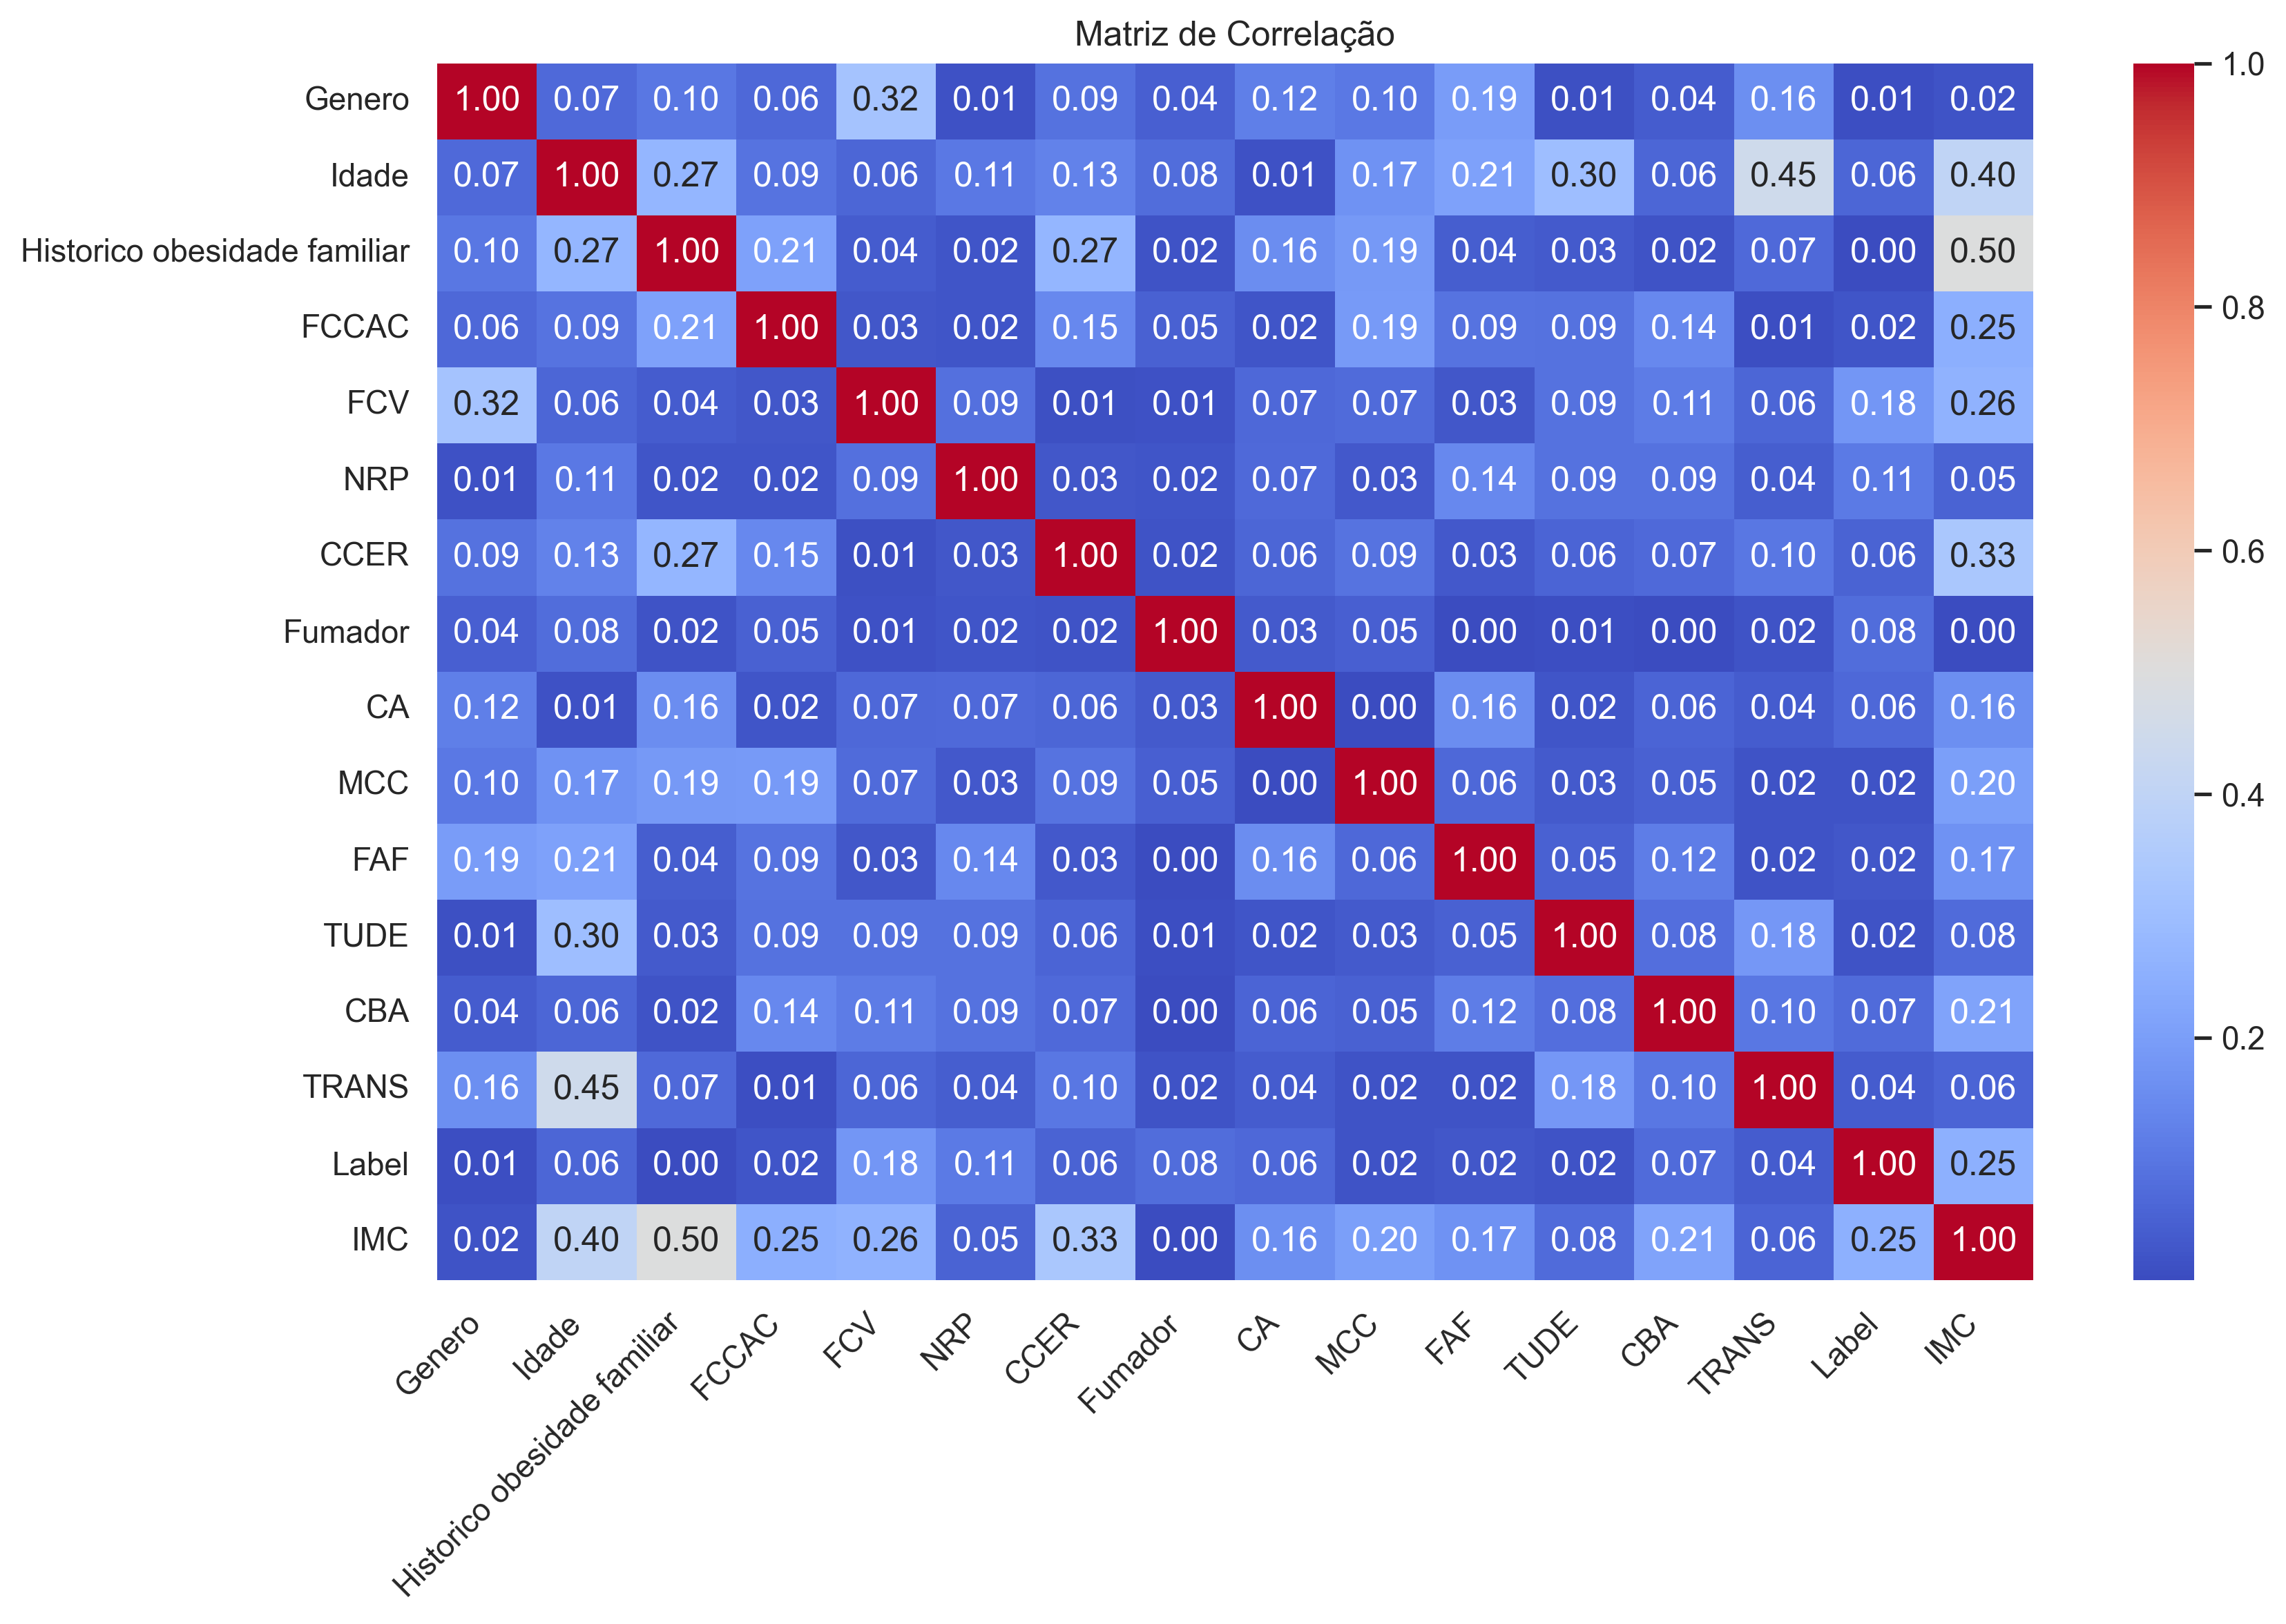

In [32]:
fig_corr = plt.figure(figsize=(12, 8))
etiquetas_corr = [undersplit(texto) for texto in dados_corr.columns]

for coluna in dados_corr.columns:
    dados_corr[coluna] = label_encoder.fit_transform(dados_corr[coluna].values)

sns.heatmap(dados_corr.corr(method="spearman").abs(), cmap='coolwarm', annot=True, fmt='.2f', mask=False)

plt.xticks(ticks=[i + 0.5 for i in range(len(dados_corr.columns))], labels=etiquetas_corr, rotation=45, ha='right')
plt.yticks(ticks=[i + 0.5 for i in range(len(dados_corr.columns))], labels=etiquetas_corr)
plt.title('Matriz de Correlação')
plt.tight_layout()

# plt.show()

Por este diagrama podemos ver que não existe uma forte correlação entre nenhum dos atributos. 

### 4.1.6

#### Hold-out

**Hold-out** é o processo de dividir um conjunto de dados em 2 sub-conjuntos de forma aleatória, um de maior dimensão que será utilizado para treinar um algoritmo de Machine Learning e o outra para o testar.


| Predictor | Target  |
|-----------|---------|
| Idade     | IMC     |

In [33]:
y = dados_trabalho.IMC
X = dados_trabalho[["Idade"]].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

#### Apresentar informação sobre os datasets de treino e aprendizagem

In [34]:
titulo("|\t\t\t\tDimensão\t\t\t|")
titulo("|   |\tTreino\t\t|\tTeste\t\t|")
texto(f"| X |\t{X_train.shape}\t|\t{X_test.shape}\t|")
texto(f"| y |\t{y_train.shape}\t\t|\t{y_test.shape}\t\t|")

|				Dimensão			|
|   |	Treino		|	Teste		|
| X |	(1688, 1)	|	(423, 1)	|
| y |	(1688,)		|	(423,)		|


#### Inicialização do algoritmo

In [35]:
regr_lin = LinearRegression()

#### Treinar o algoritmo

Para o treino utilizamos a função ``fit()``.

In [36]:
regr_lin.fit(X_train, y_train)

LinearRegression()

#### 4.1.6 a)

In [37]:
etiqueta_e_valor("Equação da reta:", f" y = {regr_lin.intercept_:.3f} + {regr_lin.coef_[0]:.3f} x")

Equação da reta::  y = 0.355 + 0.381 x


$$y = 0,355 + 0,381x$$

#### 4.1.6 b)

<Axes: xlabel='Idade', ylabel='IMC'>

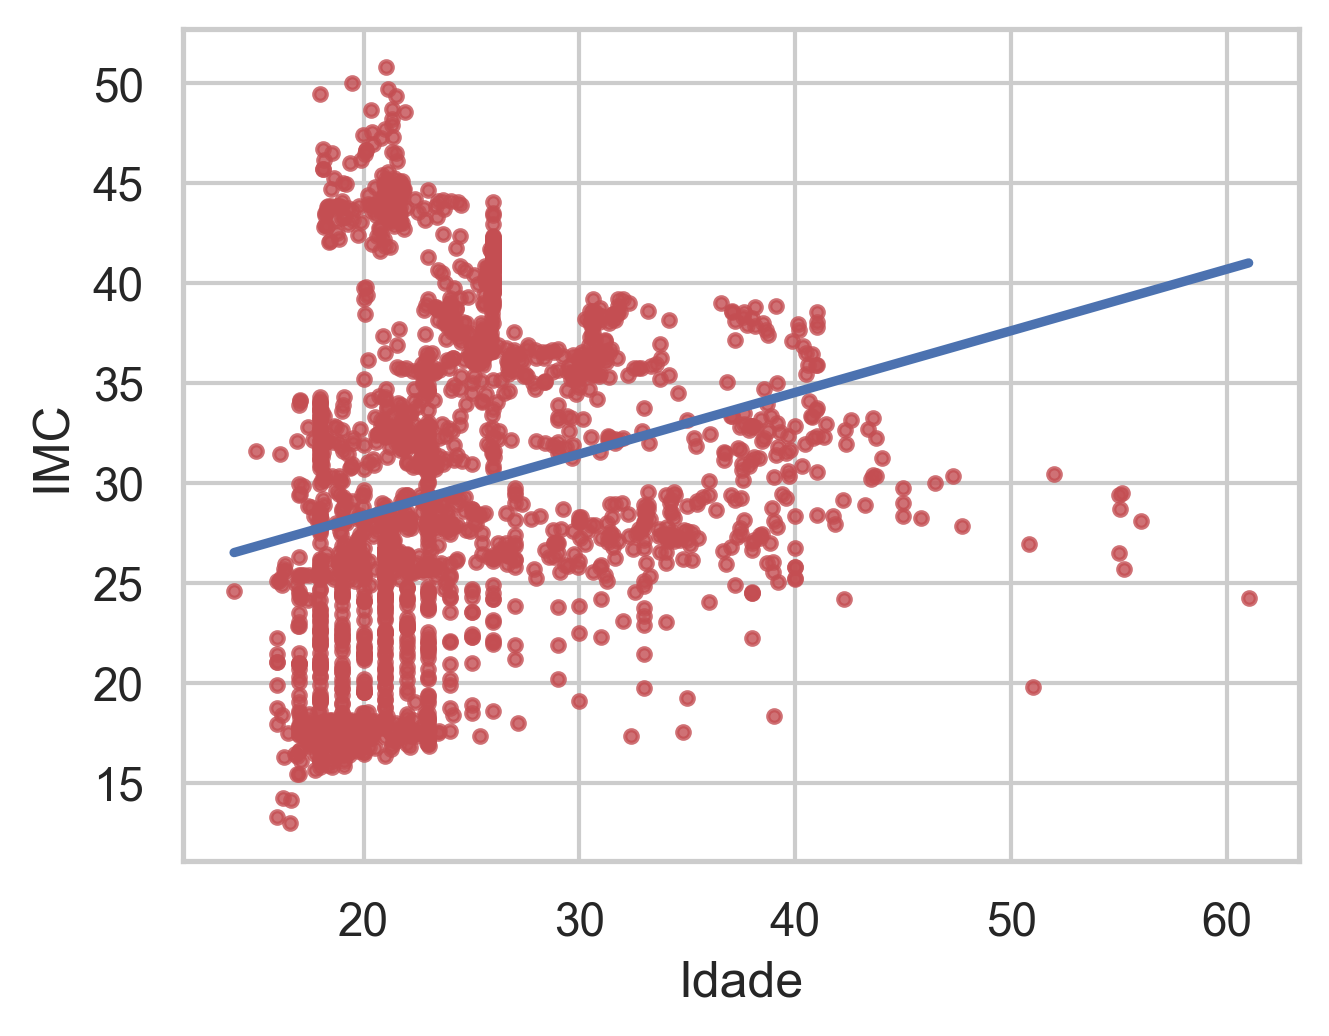

In [46]:
sns.regplot(x="Idade", y="IMC", data=dados_bruto, order=1, ci=None, scatter_kws={'color': 'r', 's': 9})

Aplicar o modelo sobre o conjunto de teste.

In [47]:
y_pred = regr_lin.predict(X_test)

#### MAE

$$MAE = \sum_{i=1}^{D}|x_i-y_i|$$

In [48]:
MAE = np.mean(abs(y_test - y_pred))
etiqueta_e_valor("MAE no conjunto de dados de teste:", f"{MAE:.3f}")

MAE no conjunto de dados de teste:: 0.169


#### RMSE

$$RMSE = \sqrt{\frac{\sum_{i=0}^{N - 1} (y_i - \hat{y}_i)^2}{N}}$$

In [49]:
RMSE = np.sqrt(np.mean((y_test - y_pred) ** 2))
etiqueta_e_valor("RMSE no conjunto de dados de teste:", f"{RMSE:.3f}")

RMSE no conjunto de dados de teste:: 0.206


#### Repetir o cálculo mas com outros previsores (preditors)

O preditor vai mudando, podemos ter uma lista com o nome das colunas e fazer um ciclo que realiza os cálculos e guardamos o resultado num dicionário.

TODO: Utilizam-se os atributos base ou os antes do tratamento de dados.   

In [57]:
# O target não vai mudar.
y = dados_trabalho.IMC

# O preditor vai mudando, podemos ter uma lista com o nome das colunas
# lista_preditores = ['Genero', 'Historico_obesidade_familiar', 'FCCAC', 'FCV', 'NRP', 'CCER', 'Fumador', 'CA', 'MCC', 'FAF', 'TUDE', 'CBA', 'TRANS']

lista_preditores = dados_trabalho.columns
# Falta o Label ???

# Resultados
resultados = {}

for preditor in lista_preditores:
    X_preditor = dados_trabalho[[preditor]].to_numpy()
    X_train_1, X_test_1, y_train, y_test = train_test_split(X_preditor, y, train_size=0.8, test_size=0.2,
                                                            random_state=100)
    line_regr = LinearRegression()
    modelo = line_regr.fit(X_train_1, y_train)

    y_pred_1 = line_regr.predict(X_test_1)

    resultados[preditor] = {
        # "X_train": X_train_1,
        # "X_test": X_test_1,
        # "y_train": y_train,
        # "y_test": y_test,
        "modelo": modelo,
        "y_pred": y_pred_1,
        "MAE": np.mean(abs(y_test - y_pred_1)),
        "RMSE": np.sqrt(np.mean((y_test - y_pred_1) ** 2))
    }


#### Tabela com os resultados

Uma vez que temos o pandas, podemos utilizar este para apresentar a informação em formato de tabela.


TODO: Agora é preciso analisar os resultados e talvez produzir algum gráfico ou análise estatistica.

In [58]:
resultado = pd.DataFrame(resultados)

resultado.loc[["MAE", "RMSE"]]


,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,Fumador,CA,MCC,FAF,...,TRANS_Transportes_Publicos,Label_Excesso_Peso_Grau_I,Label_Excesso_Peso_Grau_II,Label_Magreza_Grau_I,Label_Magreza_Grau_II,Label_Magreza_Grau_III,Label_Obesidade_Moderada,Label_Obesidade_Mórbida,Label_Obesidade_Severa,Label_Peso_Normal
MAE,0.174157,0.168747,0.151583,0.169636,0.169275,0.174196,0.174732,0.173374,0.169078,0.171724,...,0.174482,0.16007,0.172411,0.147632,0.166929,0.173195,0.163179,0.128514,0.143779,0.153374
RMSE,0.211202,0.205631,0.187125,0.204626,0.204894,0.211575,0.211966,0.210912,0.206537,0.208206,...,0.210802,0.20676,0.211392,0.186119,0.204664,0.210305,0.210305,0.16108,0.195766,0.195974


### 4.1.7

#### a) Utilizar Regressão Linear Múltipla

| Target | Preditores |
|--------|------------|
| IMC    | ??         |

Ver TP5


Holdout



In [ ]:
y = dados_trabalho.IMC
X = dados_trabalho[lista_preditores].to_numpy() 


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, 
                                                    random_state = 100)

TODO: Imprimir a equação corretamente
TODO: Rever o código é cópia do TP5 

In [ ]:
## Initialize algorithm
mlr = LinearRegression()

## Fit the data
mlr.fit(X_train,y_train)

print("Eq. da reta: y=", mlr.intercept_, "+", mlr.coef_, "x")

In [ ]:
#Prediction of test set
y_pred_mlr= mlr.predict(X_test)
#Predicted values
#print("Prediction for test set: {}".format(y_pred_mlr))

In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

In [ ]:
#Model Evaluation
from sklearn import metrics

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)

rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('R squared: {:.2f}'.format(mlr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

#### b) DecisionTreeRegressor

Vamos usar os mesmos sets de treino e de teste.

TODO: Rever o código é cópia do TP5, ver TP7 tem uns testes que talvez sejam necessários.

In [ ]:
#tree = DecisionTreeRegressor(random_state=42)
tree = DecisionTreeRegressor(random_state=42, max_depth=6, min_samples_split=3)# Restrição de alguns parâmetros da árvore
model = tree.fit(X_train, y_train)

y_pred = tree.predict(X_train)
y_pred1 = tree.predict(X_test)



In [ ]:
MAE1 = metrics.mean_absolute_error(y_train, y_pred)
MAE2 = metrics.mean_absolute_error(y_test, y_pred1)
MAE3 = np.mean(abs(y_test-y_pred1)) #efetuando os cálculos

print("MAE on training set: {:.3f}".format(MAE1))
print("MAE on test set: {:.3f}".format(MAE2))
print("MAE on test set: {:.3f}".format(MAE3)) #efetuando os cálculos

RMSE = np.sqrt(np.mean((y_test-y_pred1)**2))
print("RMSE: {:.4f}".format(RMSE))

Visualização da Regression Tree

In [ ]:
# plot tree


tree.plot_tree(model, 
          feature_names = list(dados_trabalho.columns), 
          class_names = list(dados_trabalho['sales']),  
          filled=True,                    
          fontsize=6);

In [ ]:
## the model:
from sklearn.tree import export_text
print(export_text(model,
                  show_weights=True))

#### c) MLPRegressor

TODO: Rever código é cópia do TP7

In [ ]:


nn = MLPRegressor(hidden_layer_sizes=Nhidden,
                                          activation='tanh',
                                          solver='lbfgs', max_iter=1000, learning_rate_init=0.001)

In [ ]:
nn.fit(X_train, y_train)

In [ ]:


# Make prediction
pred = nn.predict(X_test)
#
# Calculate accuracy and error metrics
#
test_set_rsquared = nn.score(X_test, y_test)
test_set_rmse = np.sqrt(mean_squared_error(y_test, pred))
#
# Print R_squared and RMSE value
#
print('R_squared value: ', test_set_rsquared)
print('RMSE: ', test_set_rmse)

In [ ]:
print("weights between input and first hidden layer:")
print(nn.coefs_[0])
print("\nweights between first hidden and second hidden layer:")
print(nn.coefs_[1])

### 4.1.8

TODO Realizar os cálculos do MAE e RMSE do 4.1.7 colunas num DataFrame e imprimir

In [ ]:
comparar_417 = pd.DataFrame()
comparar_417

### 4.1.9

TODO: Estudo estatistico (ttest_ind) ? para os 2 modelos que apresentem melhores resultados.